<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:180%;
           font-family:Oswald;
           letter-spacing:0.7px">

<p style= "padding: 5px;
                  color:white;">
    
    
<p style = "text-align:center;"> Customer Churn prediction & clustering 📊

</p>
</div>
    

# Introduction:
- In simple Terms Customer Churn prediction means knowing which customers are likely to leave or unsubscribe from your service.
By pinpointing customers that are about to churn in real time,
we have time to save them with support and marketing efforts.

# primary objective:
- using customer data visualization combined with machine learning algorithms such as logistic regression,decision trees and random forest classifier, to rank or determine a customer's likelihood to churn.

# About Dataset : 
- This dataset is about customers who subscribed to a call service in the US.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)
#load the data
df = pd.read_csv("churn.csv")
df.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   CustServ Calls  Churn?  
0               1  False.  
1               1  False.  
2               0  False.  
3               2  False.  
4               3  False.  

[5 rows x 21 columns]

### Understanding our dataset

In [2]:
#understand the data architecture
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [3]:
# viewing categorical variable counts 
df.select_dtypes(include="object").nunique()

State           51
Phone         3333
Int'l Plan       2
VMail Plan       2
Churn?           2
dtype: int64

In [4]:
# viewing numeric variable counts
df.select_dtypes(include="int").nunique()

Account Length    212
Area Code           3
VMail Message      46
Day Calls         119
Eve Calls         123
Night Calls       120
Intl Calls         21
CustServ Calls     10
dtype: int64

In [5]:
# dropping unneeded data
df.drop([ "Phone","Account Length","Area Code" ,"VMail Message","Day Mins","Night Mins" ,"Intl Mins","Eve Mins"],axis=1, inplace = True)

# Explository Data Visualisation

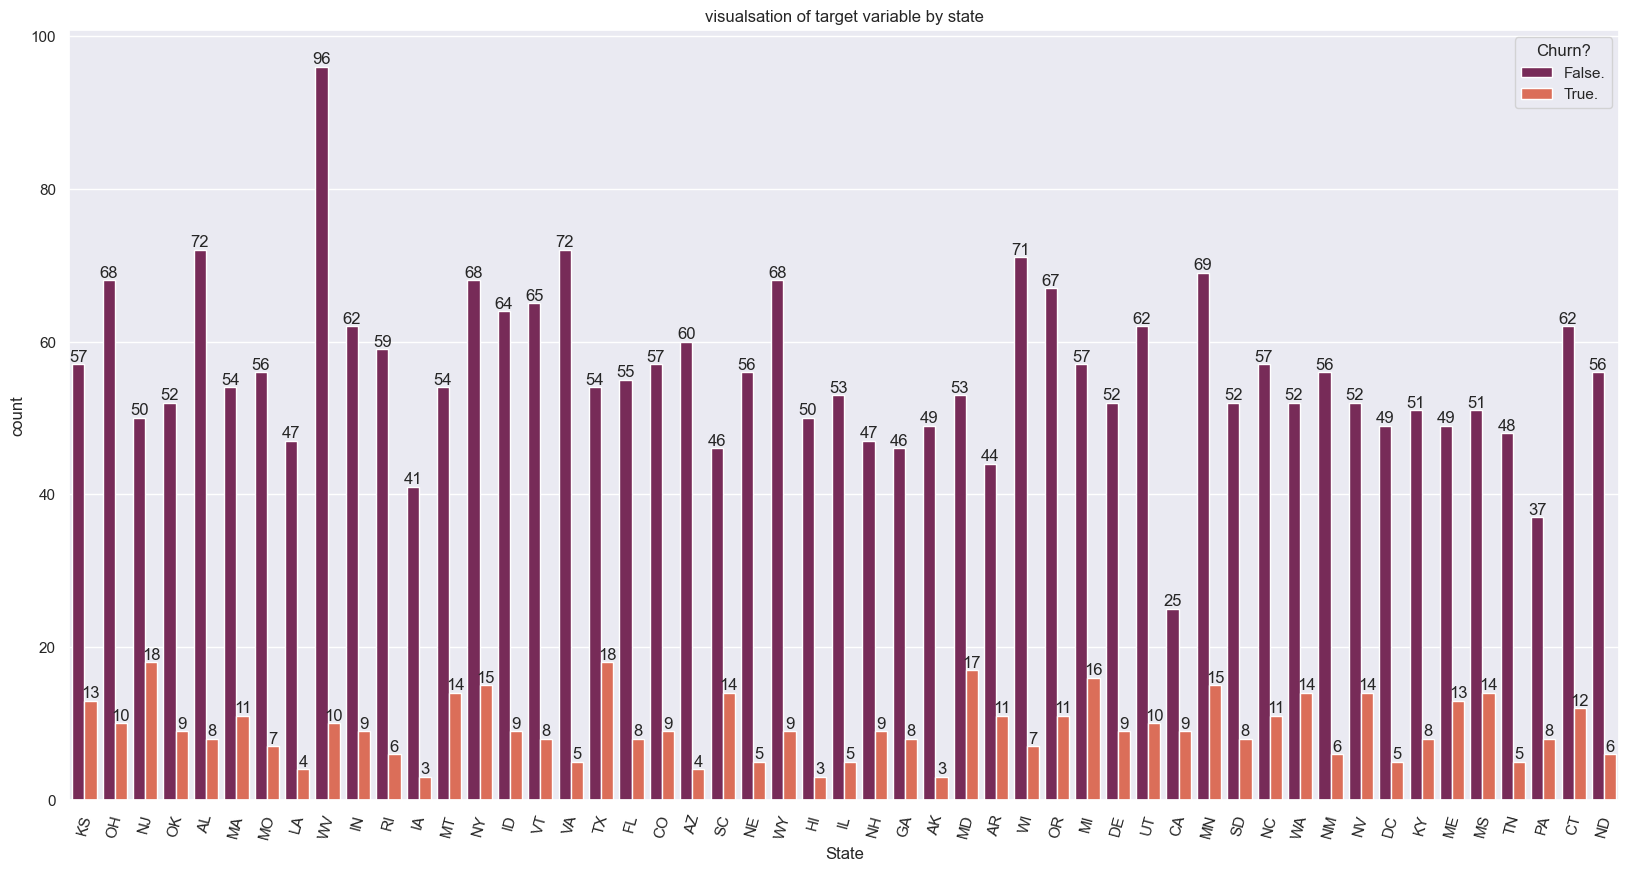

In [6]:
# reuired plot size
plt.figure(figsize=(20,10))
# plot variables
ax = sns.countplot(x="State",hue="Churn?",data = df ,palette="rocket")
#set a theme
ax.set_title("visualsation of target variable by state")
# set a rotation partterns
plt.xticks(rotation=75)
ax.bar_label(ax.containers[0],fmt="%.0f",label_type="edge")
ax.bar_label(ax.containers[1],fmt="%.0f",label_type="edge")

# show plot
plt.show()

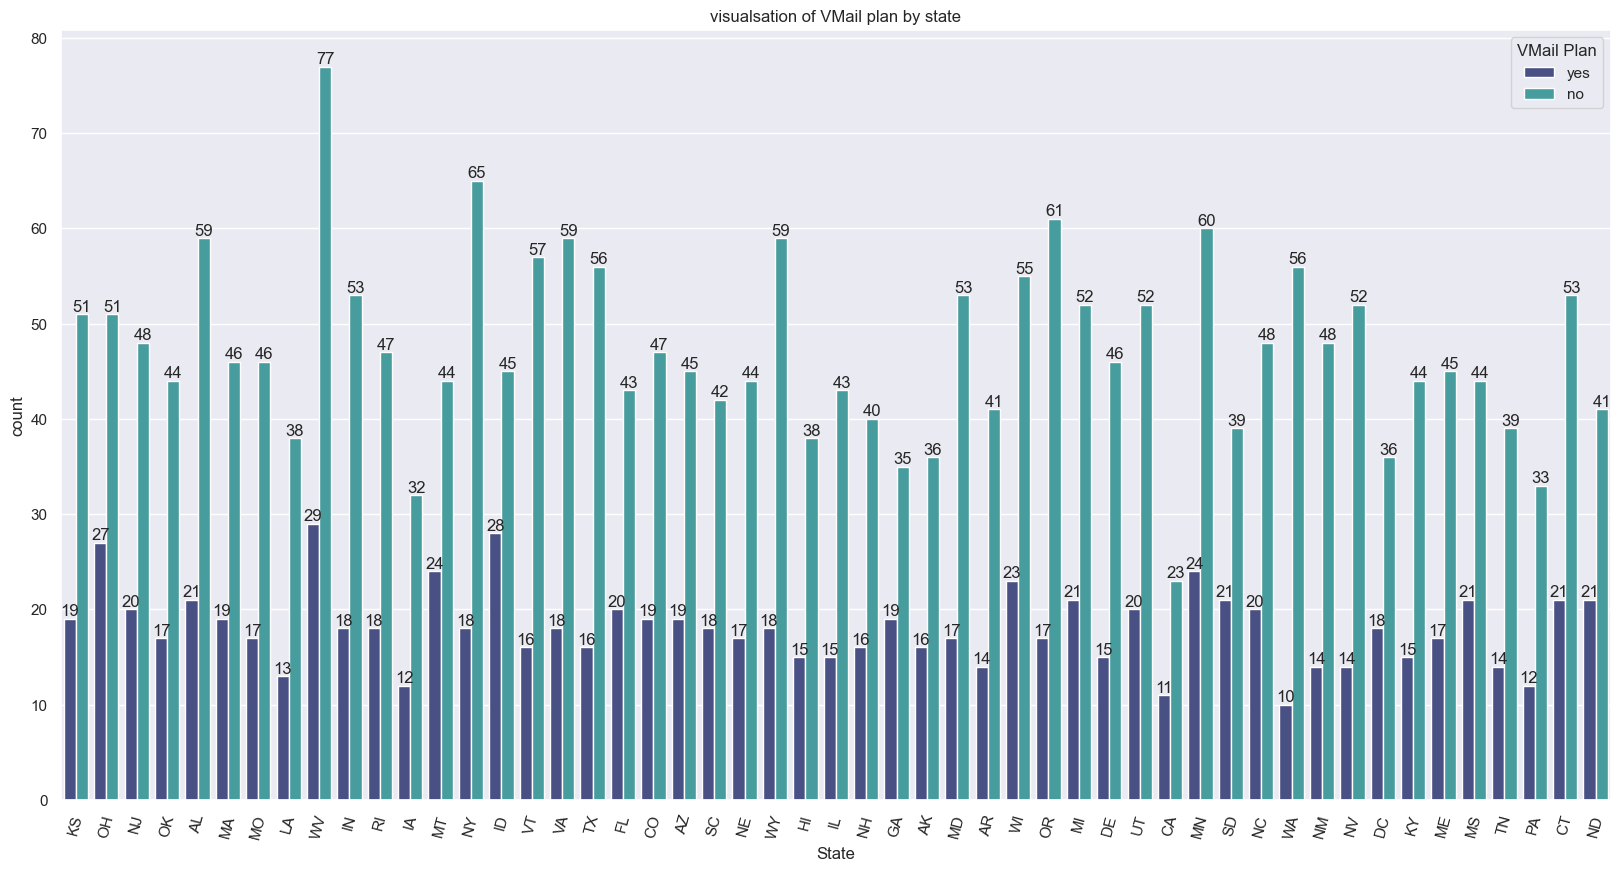

In [7]:
#required plot size
plt.figure(figsize=(20,10))
# plot visualization
ax= sns.countplot(x="State",hue="VMail Plan",data = df ,palette="mako")
#set a title
ax.set_title("visualsation of VMail plan by state")
# create a rotation pattern
plt.xticks(rotation=75)
ax.bar_label(ax.containers[0],fmt="%.0f",label_type="edge")
ax.bar_label(ax.containers[1],fmt="%.0f",label_type="edge")
#show plots
plt.show()

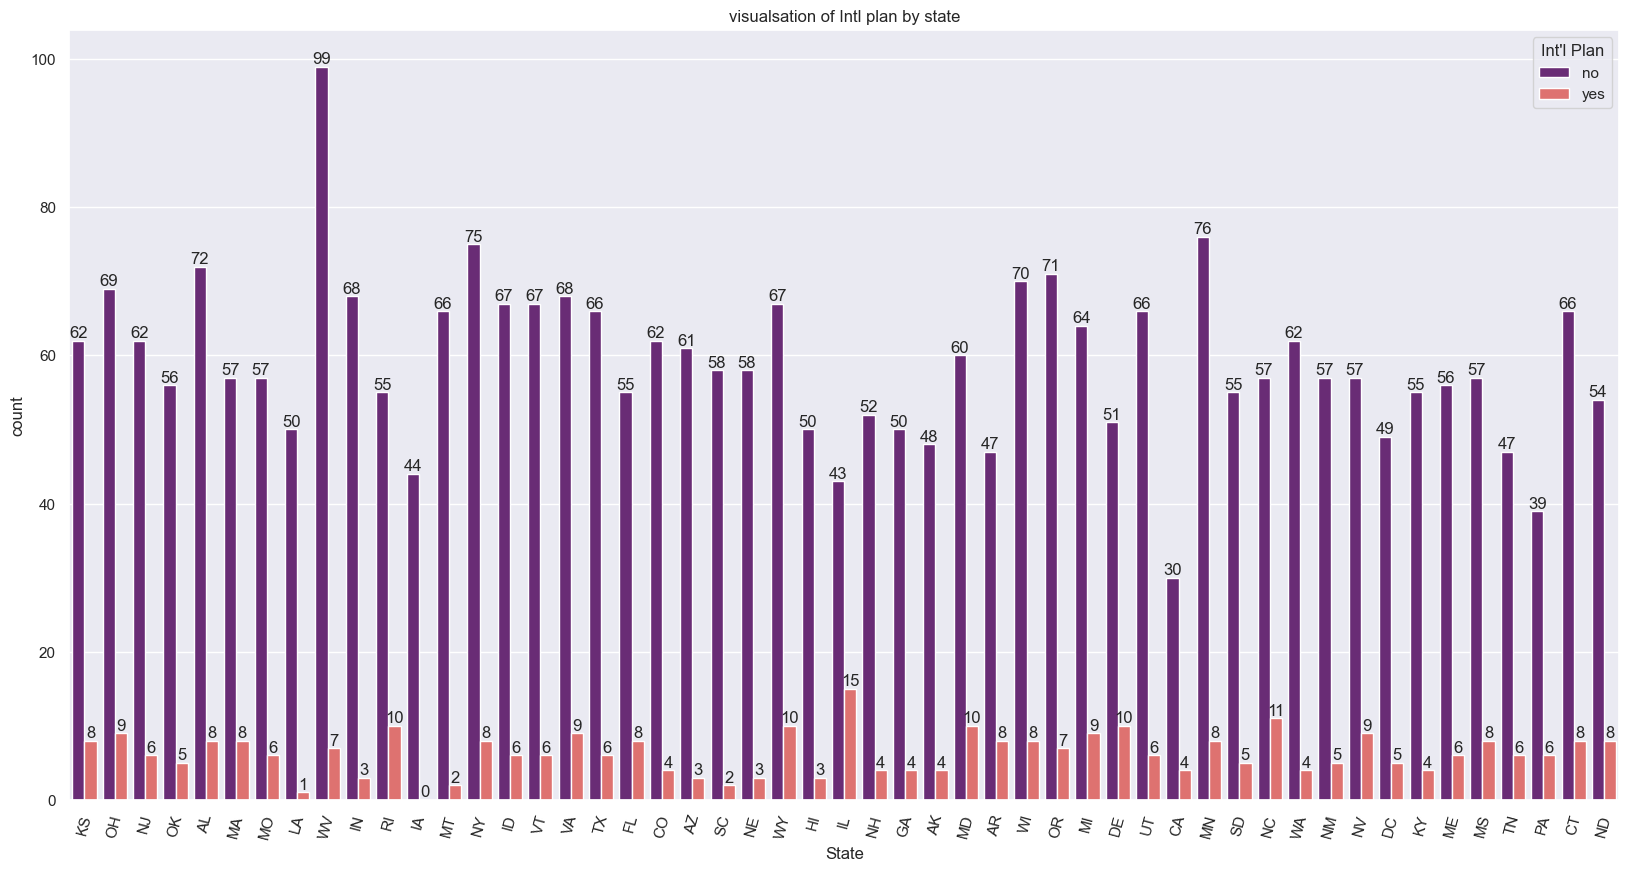

In [8]:
#required plot size
plt.figure(figsize=(20,10))
# plot visualization
ax= sns.countplot(x="State",hue="Int'l Plan",data = df ,palette="magma")
#set a title
ax.set_title("visualsation of Intl plan by state")
# create a rotation pattern
plt.xticks(rotation=75)
ax.bar_label(ax.containers[0],fmt="%.0f",label_type="edge")
ax.bar_label(ax.containers[1],fmt="%.0f",label_type="edge")
# show plot
plt.show()

# Categorical Data Visualisation of Target Variable

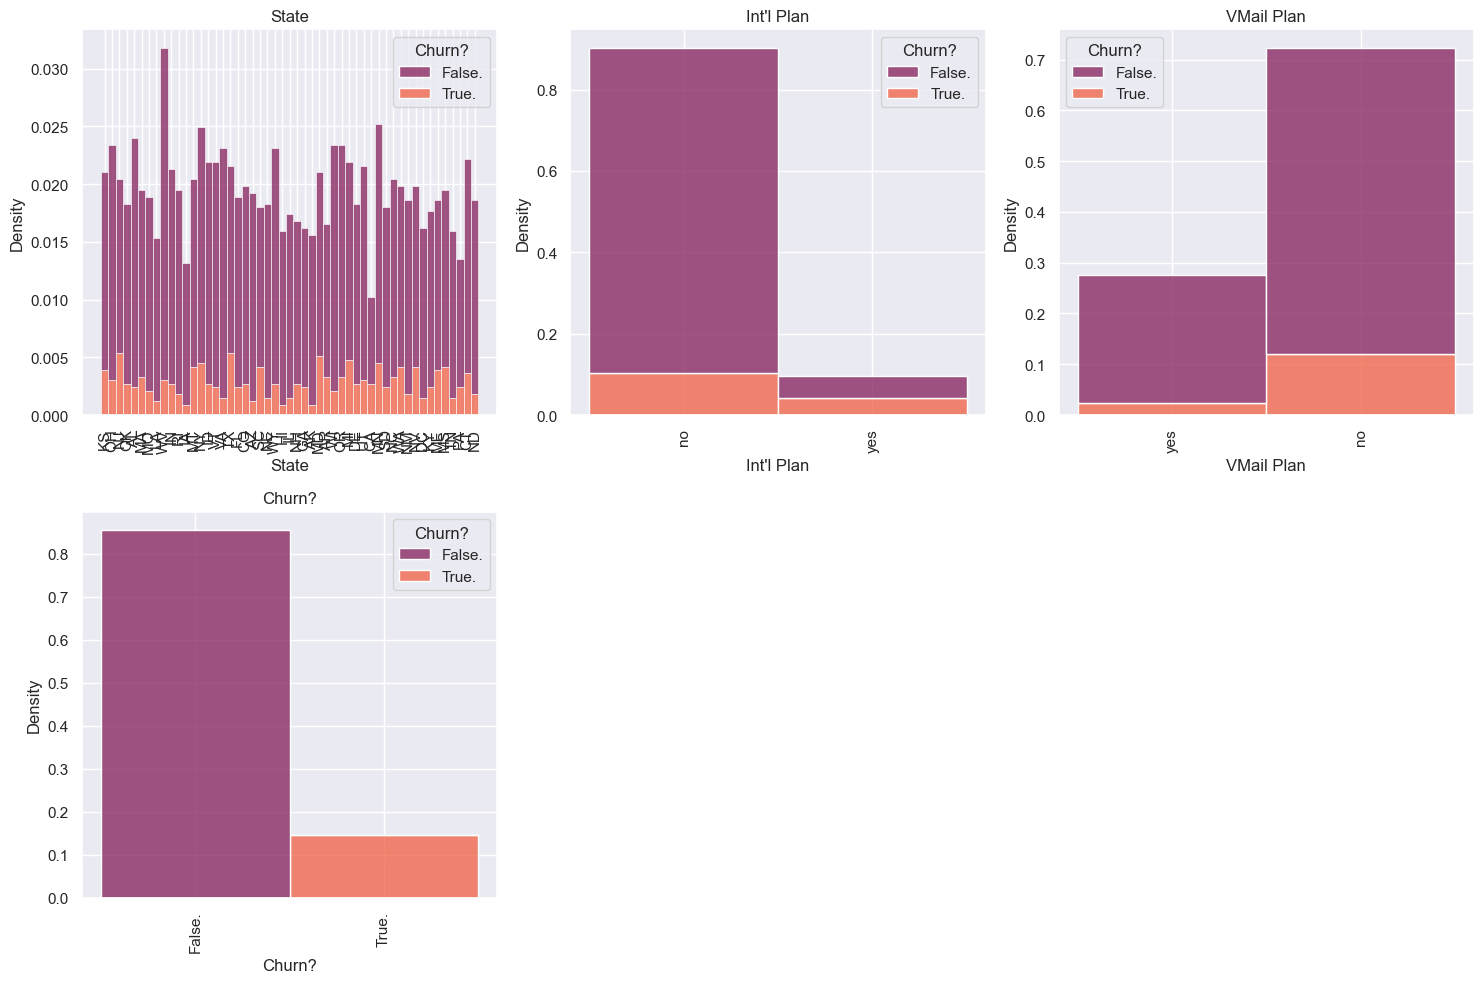

In [9]:
# Get the names of all columns with data type ‘object’ (categorical columns)
cat_vars = df.select_dtypes(include="object").columns.tolist()

# Create the stacked density plot

num_cols = len(cat_vars)

num_rows = (num_cols + 2) // 3

fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.histplot(data=df, x=var, hue="Churn?", stat='density', multiple="stack", ax=axs[i] ,palette="rocket")
    axs[i].set_title(var)
    axs[i].set_ylabel("Density")
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
                 for i in range(num_cols, len(axs)):
                    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

# numeric data visualisation

In [10]:
int_vars = df.select_dtypes(include="int").columns.tolist()

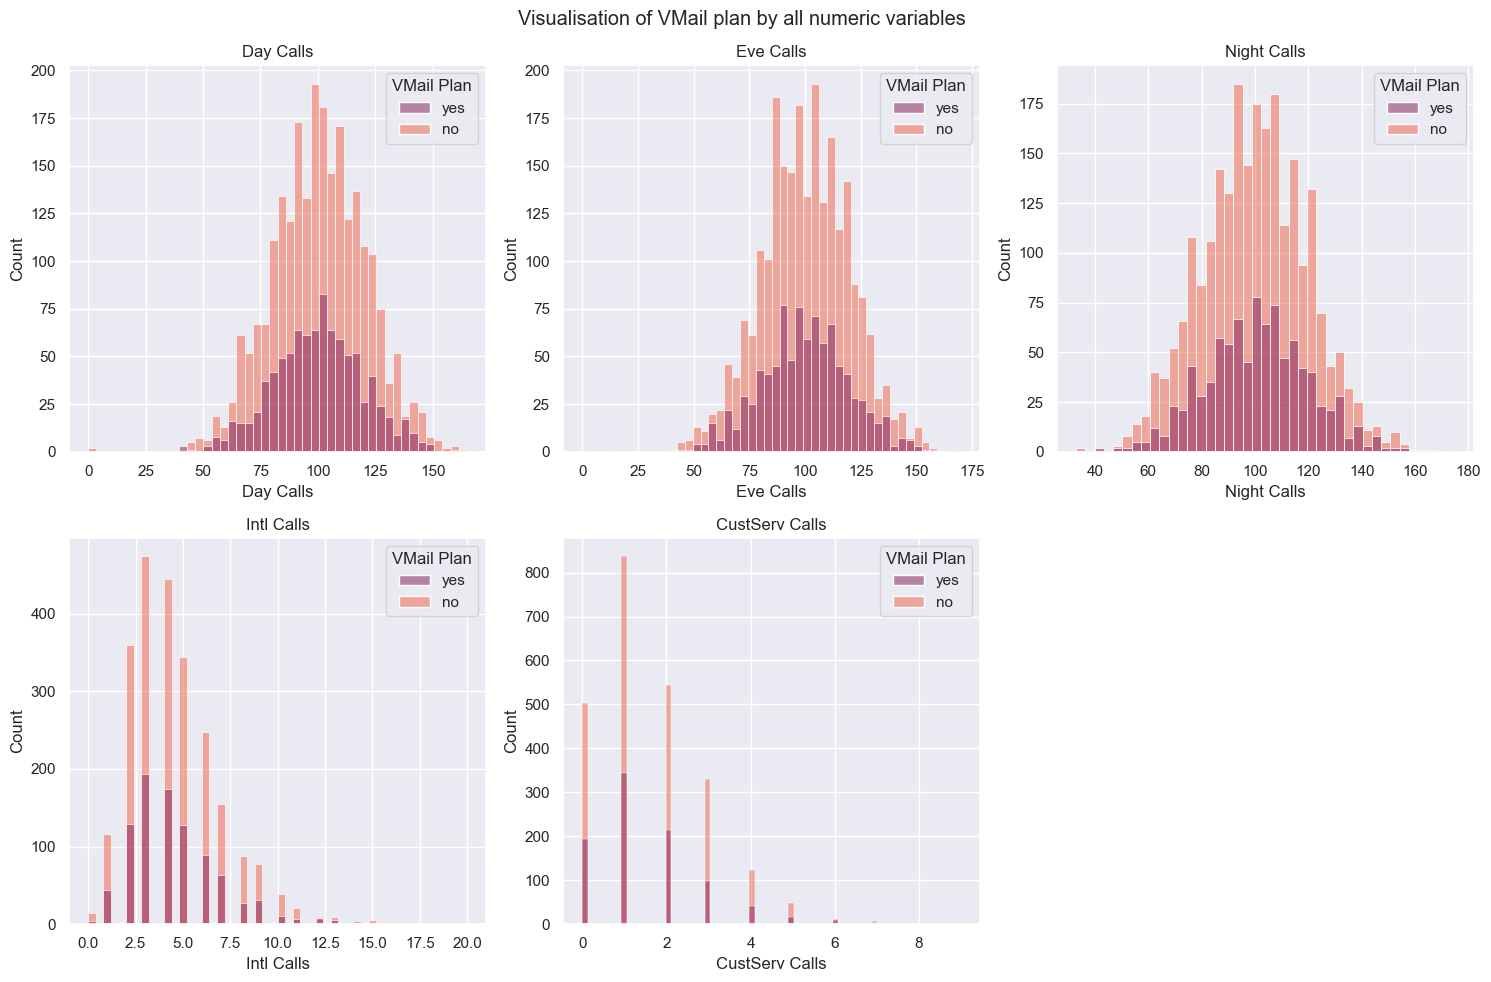

In [11]:
#  Variables of all columns with data type ‘int'
int_vars = df.select_dtypes(include="int").columns.tolist()

#  figure with subplots

num_cols = len(int_vars)

num_rows=(num_cols + 2) // 3 # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

axs = axs.flatten()

 

# Create a  histplot for each integer variable using Seaborn with hue='churn?'
for i, var in enumerate(int_vars):
    sns.histplot(x=var, hue="VMail Plan" , data=df, ax=axs[i],palette="rocket")
    fig.suptitle("Visualisation of VMail plan by all numeric variables")

    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# create spacing between subplots
    fig.tight_layout()

# Show plot
    plt.show()


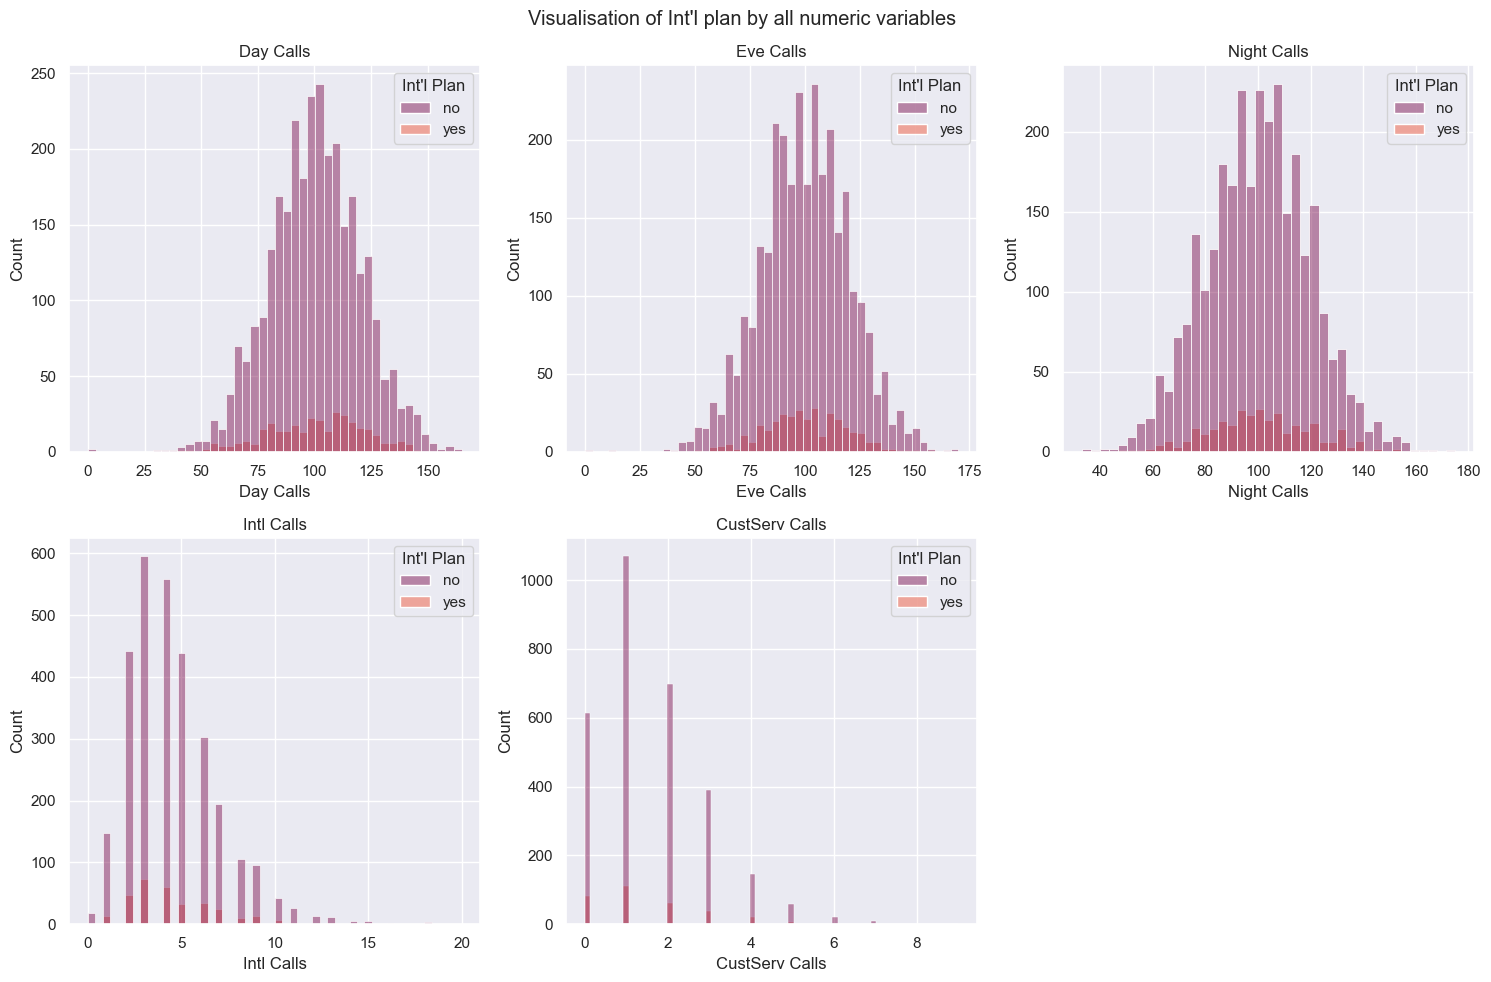

In [12]:
# Variables of all columns with data type ‘int'
int_vars = df.select_dtypes(include="int").columns.tolist()

# Create a figure with subplots

num_cols = len(int_vars)

num_rows=(num_cols + 2) // 3 # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

axs = axs.flatten()

 

# Create a histplot for each integer variable using Seaborn with hue='churn?'
for i, var in enumerate(int_vars):
    sns.histplot(x=var, hue="Int'l Plan", data=df, ax=axs[i],palette="rocket")
    fig.suptitle("Visualisation of Int'l plan by all numeric variables")
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Create spacing between subplots
    fig.tight_layout()

# Show plot
    plt.show()



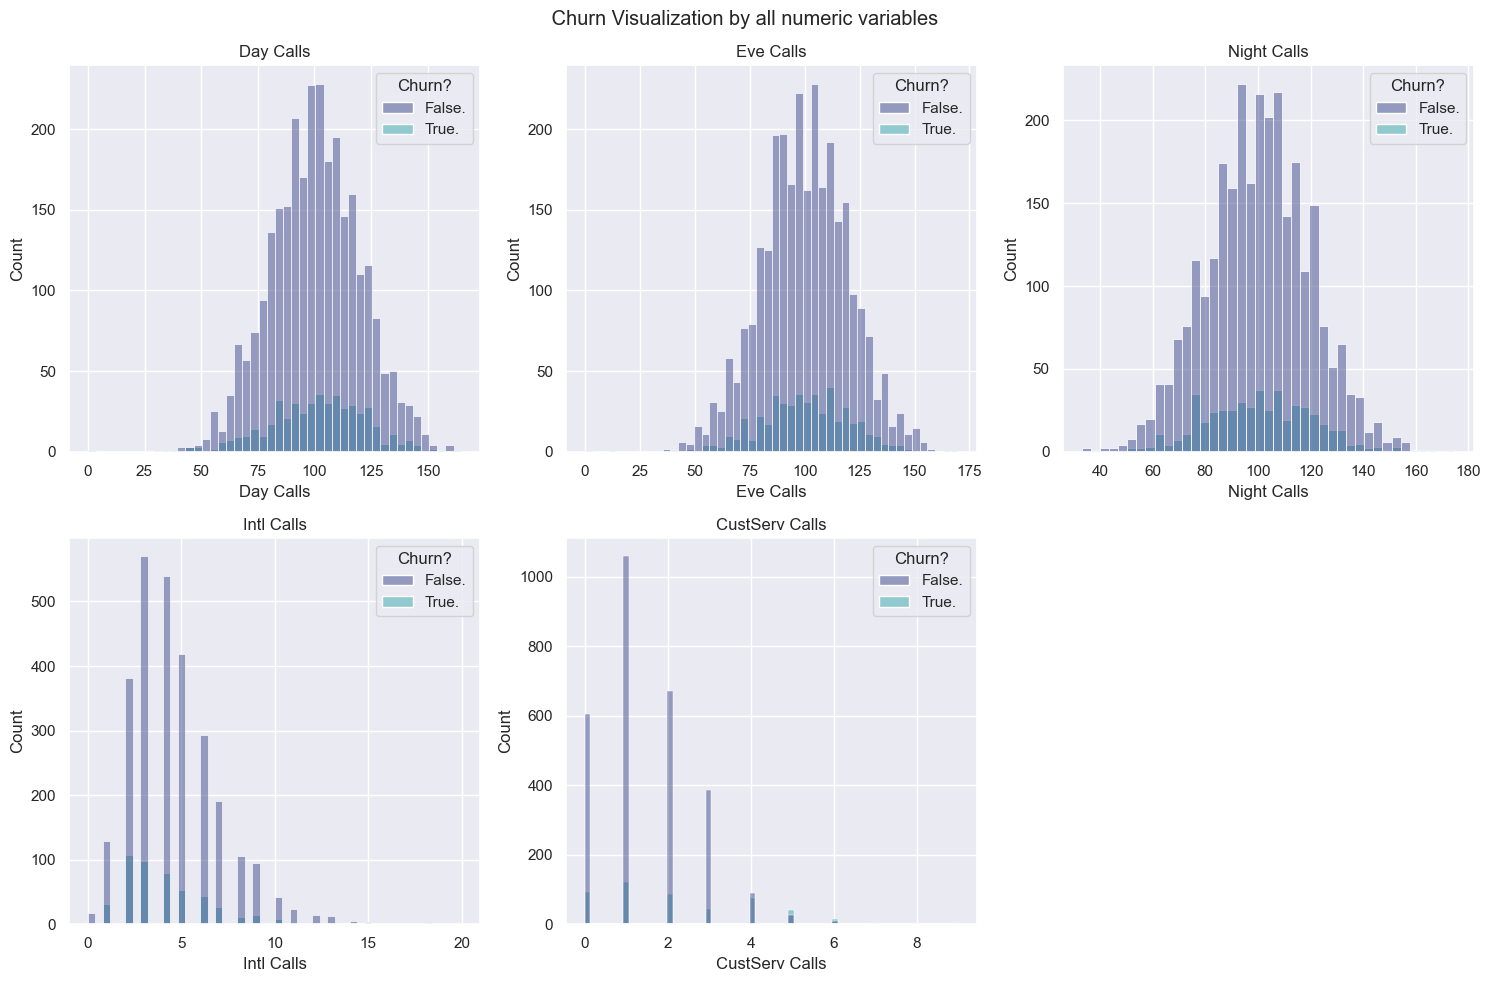

In [15]:
int_vars = df.select_dtypes(include="int").columns.tolist()

# Create a figure with subplots

num_cols = len(int_vars)

num_rows=(num_cols + 2) // 3 # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

axs = axs.flatten()

 

# Create a histplot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.histplot(x=var, hue="Churn?", data=df, ax=axs[i],palette="mako")
    fig.suptitle(" Churn Visualization by all numeric variables")
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
    fig.tight_layout()

# Show plot
    plt.show()

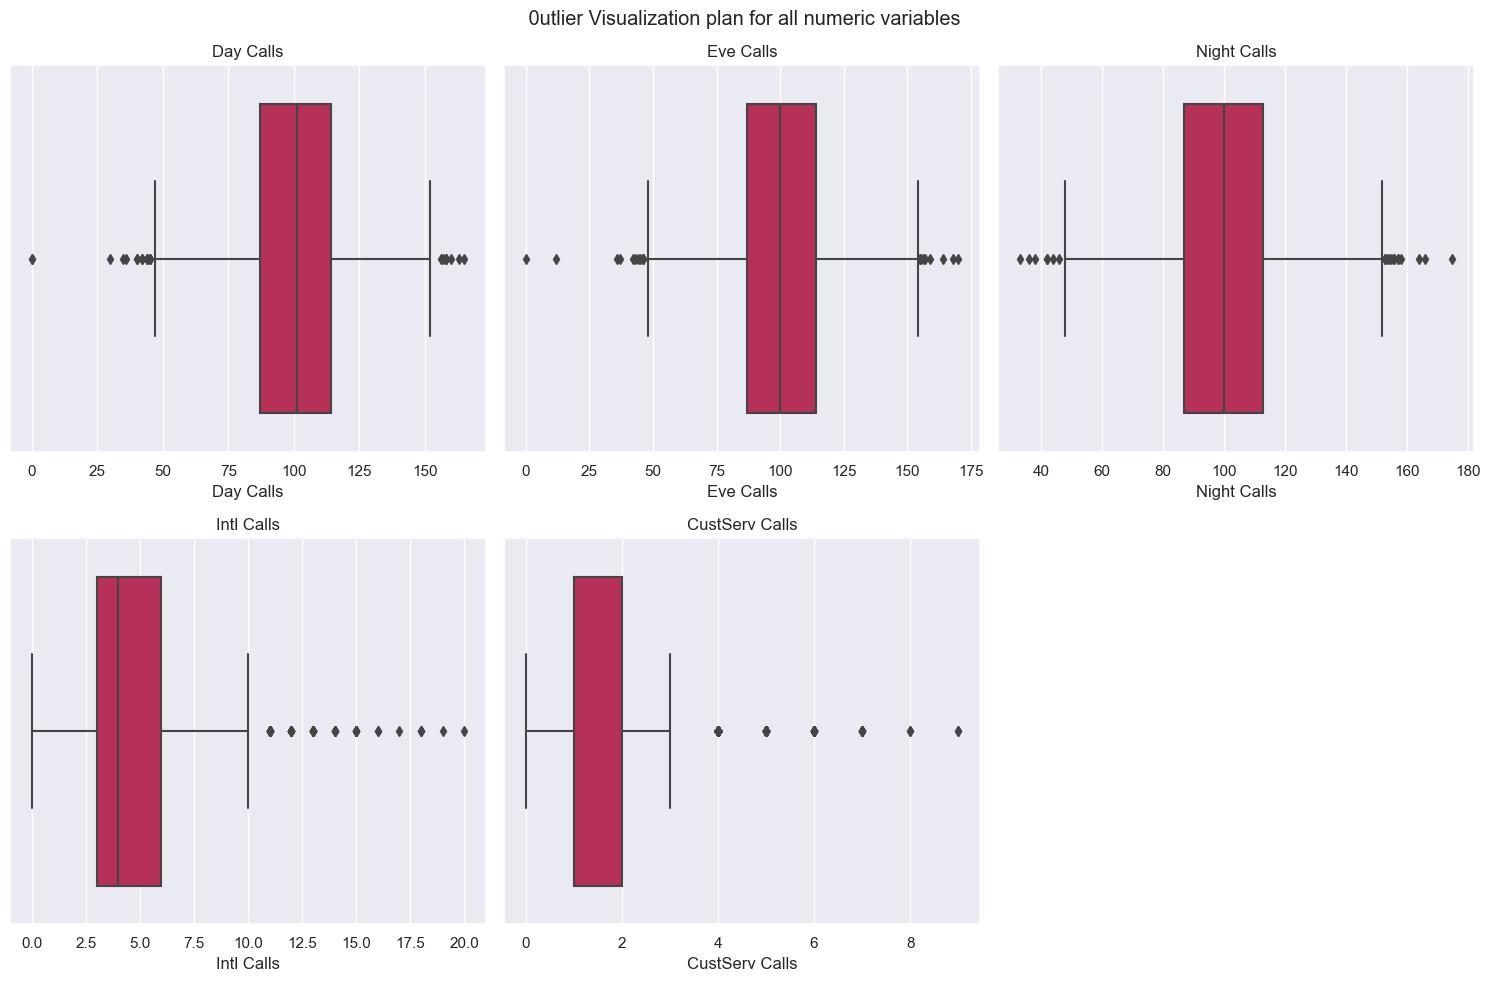

In [16]:
 # Get the names of all columns with data type ‘int'
int_vars = df.select_dtypes(include="int").columns.tolist()

# Create a figure with subplots

num_cols = len(int_vars)

num_rows=(num_cols + 2) // 3 # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))


axs = axs.flatten()

 

# Create a box plot for each integer variable using Seaborn
for i, var in enumerate(int_vars):
    sns.boxplot(x=df[var], ax=axs[i],palette="rocket")
    fig.suptitle(" 0utlier Visualization plan for all numeric variables")
    axs[i].set_title(var)
    
# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
        # Adjust spacing between subplots
    fig.tight_layout()

# Show plot
    plt.show()

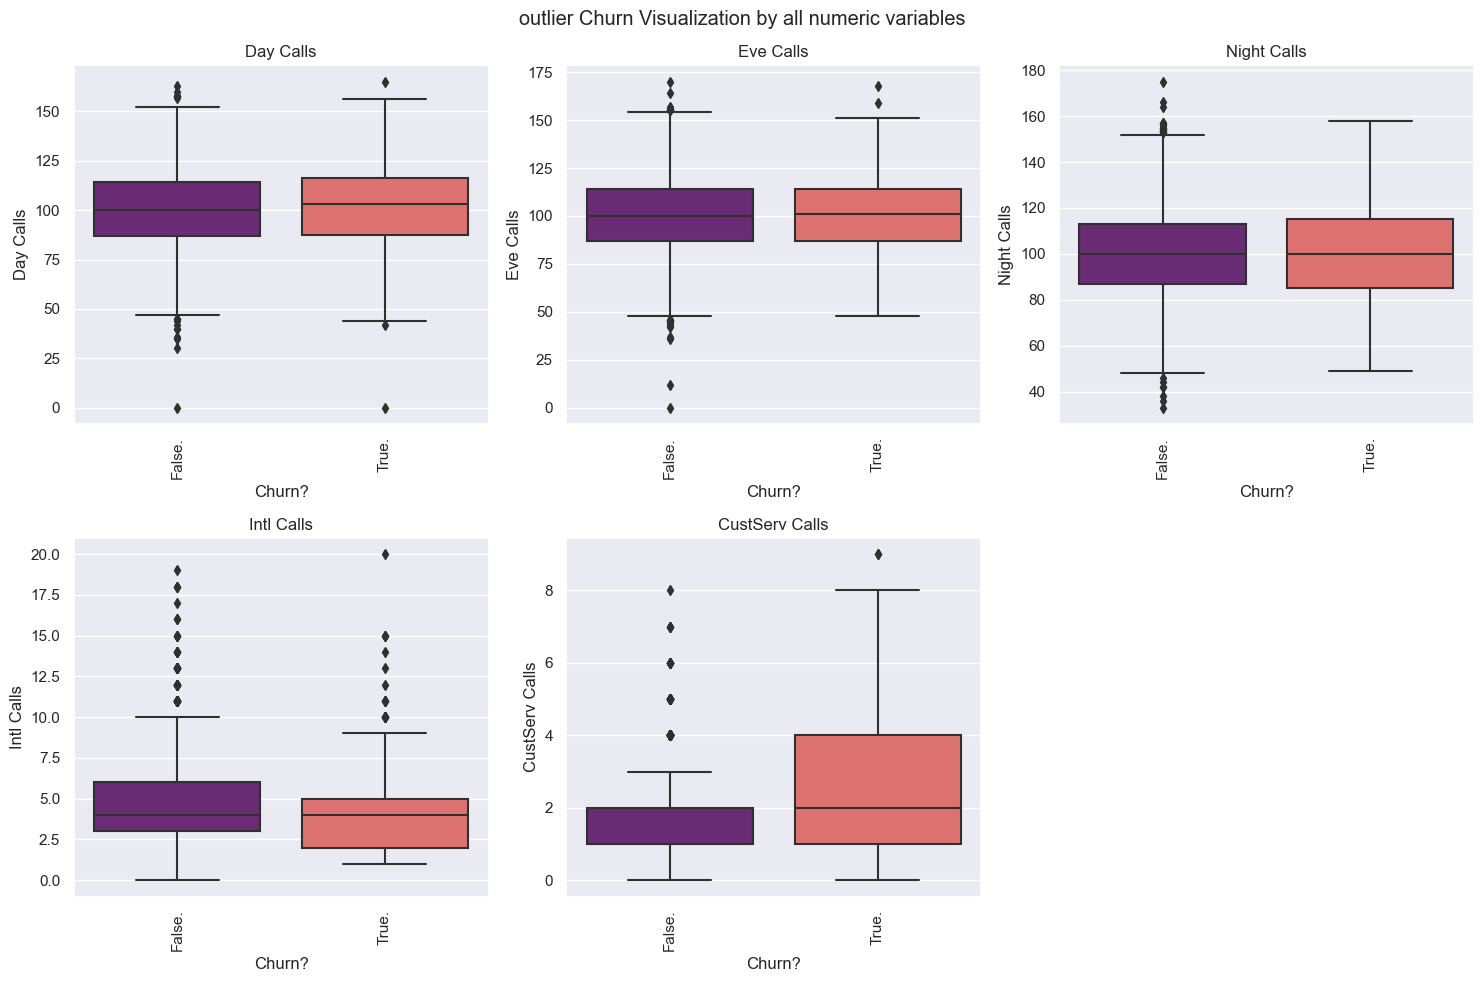

In [17]:
# Get the names of all columns with data type ‘int'
int_vars = df.select_dtypes(include="int").columns.tolist()

# Create a figure with subplots

num_cols = len(int_vars)

num_rows=(num_cols + 2) // 3 # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

axs = axs.flatten()

 

# Create a box plot for each integer variable using Seaborn with hue='Churn?'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x="Churn?", data=df, ax=axs[i],palette="magma")
    fig.suptitle("outlier Churn Visualization by all numeric variables")
    axs[i].set_title(var)
    axs[i].tick_params(axis="x", rotation=90)
# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
    fig.tight_layout()

# Show plot
    plt.show()


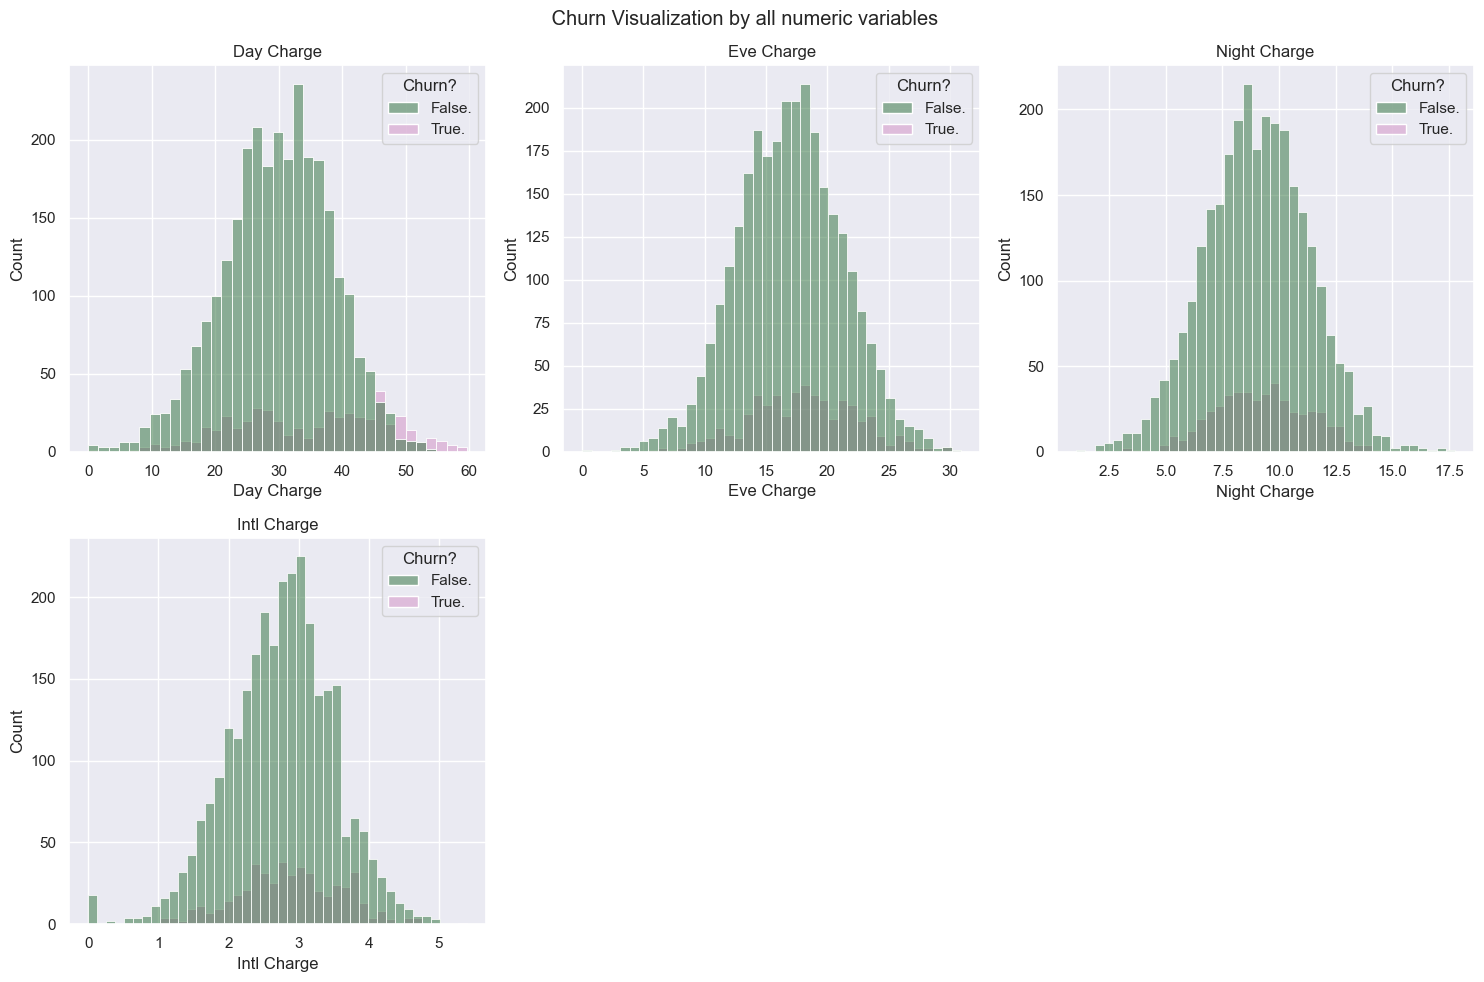

In [21]:
# Get the names of all columns with data type ‘float'
float_vars = df.select_dtypes(include="float").columns.tolist()

# Create a figure with subplots

num_cols = len(float_vars)

num_rows=(num_cols + 2) // 3 # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

axs = axs.flatten()

 

# Create a histplot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.histplot(x=var, hue="Churn?", data=df, ax=axs[i],palette="cubehelix")
    fig.suptitle(" Churn Visualization by all numeric variables")
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
    fig.tight_layout()

# Show plot
    plt.show()

# Converting Categorical to binary numbers

In [53]:
for col in df.select_dtypes(include=["object"]).columns:

# Print the column name and the unique values
  print(f"{col}: {df[col].unique()}")

In [54]:
from sklearn import preprocessing
for col in df.select_dtypes(include=[ "object"]).columns:
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

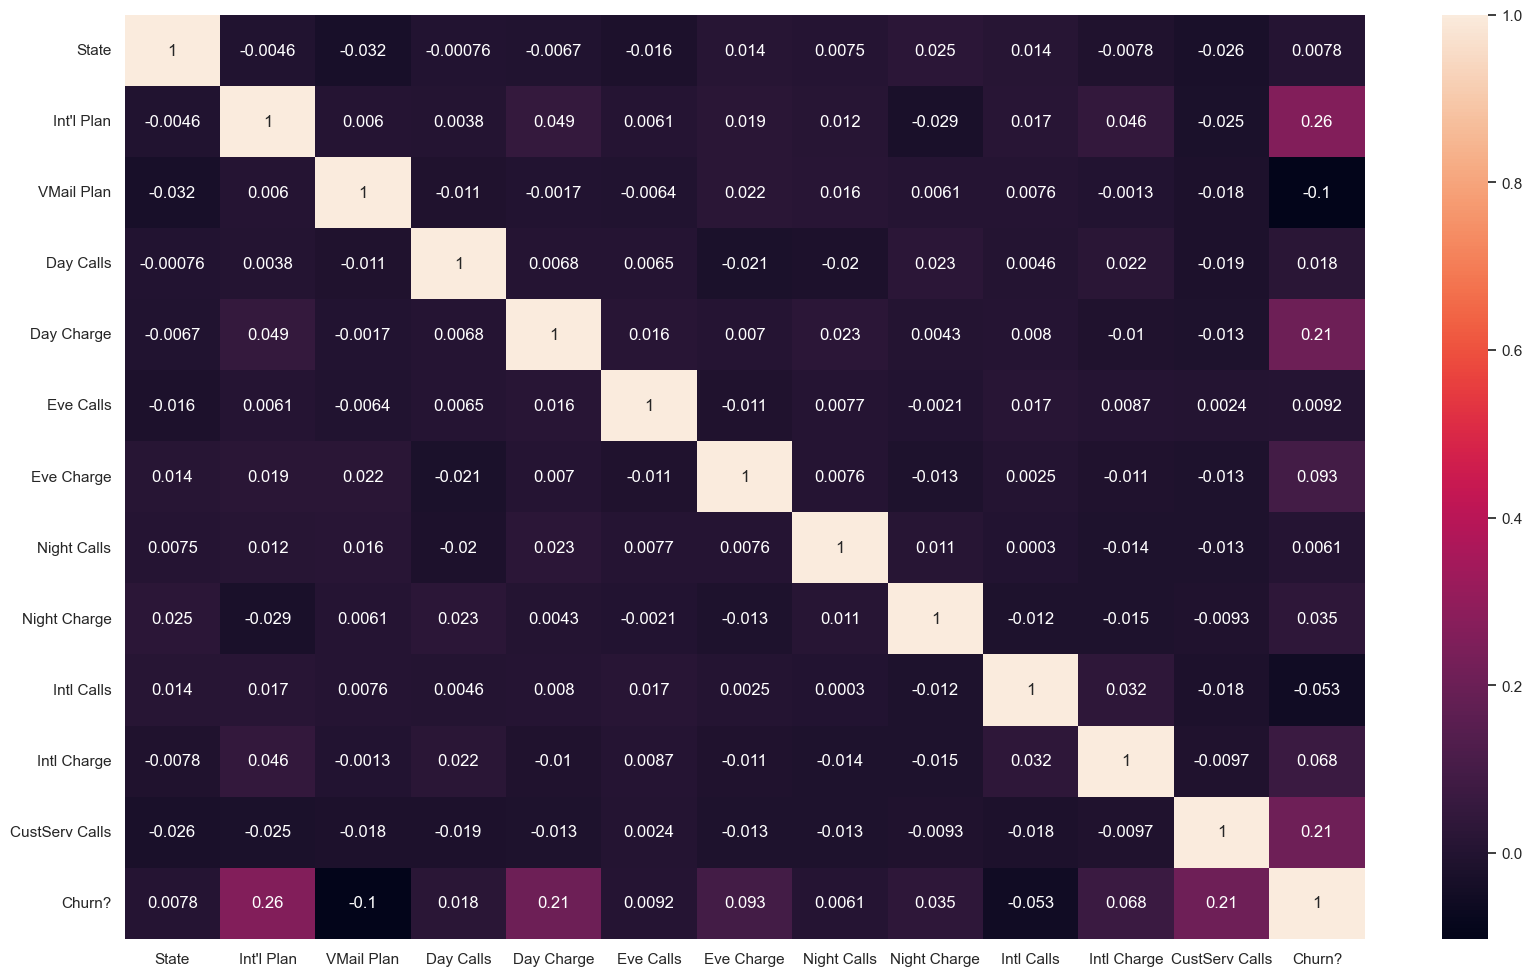

In [55]:
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(),fmt=".2g", annot= True)
plt.show()

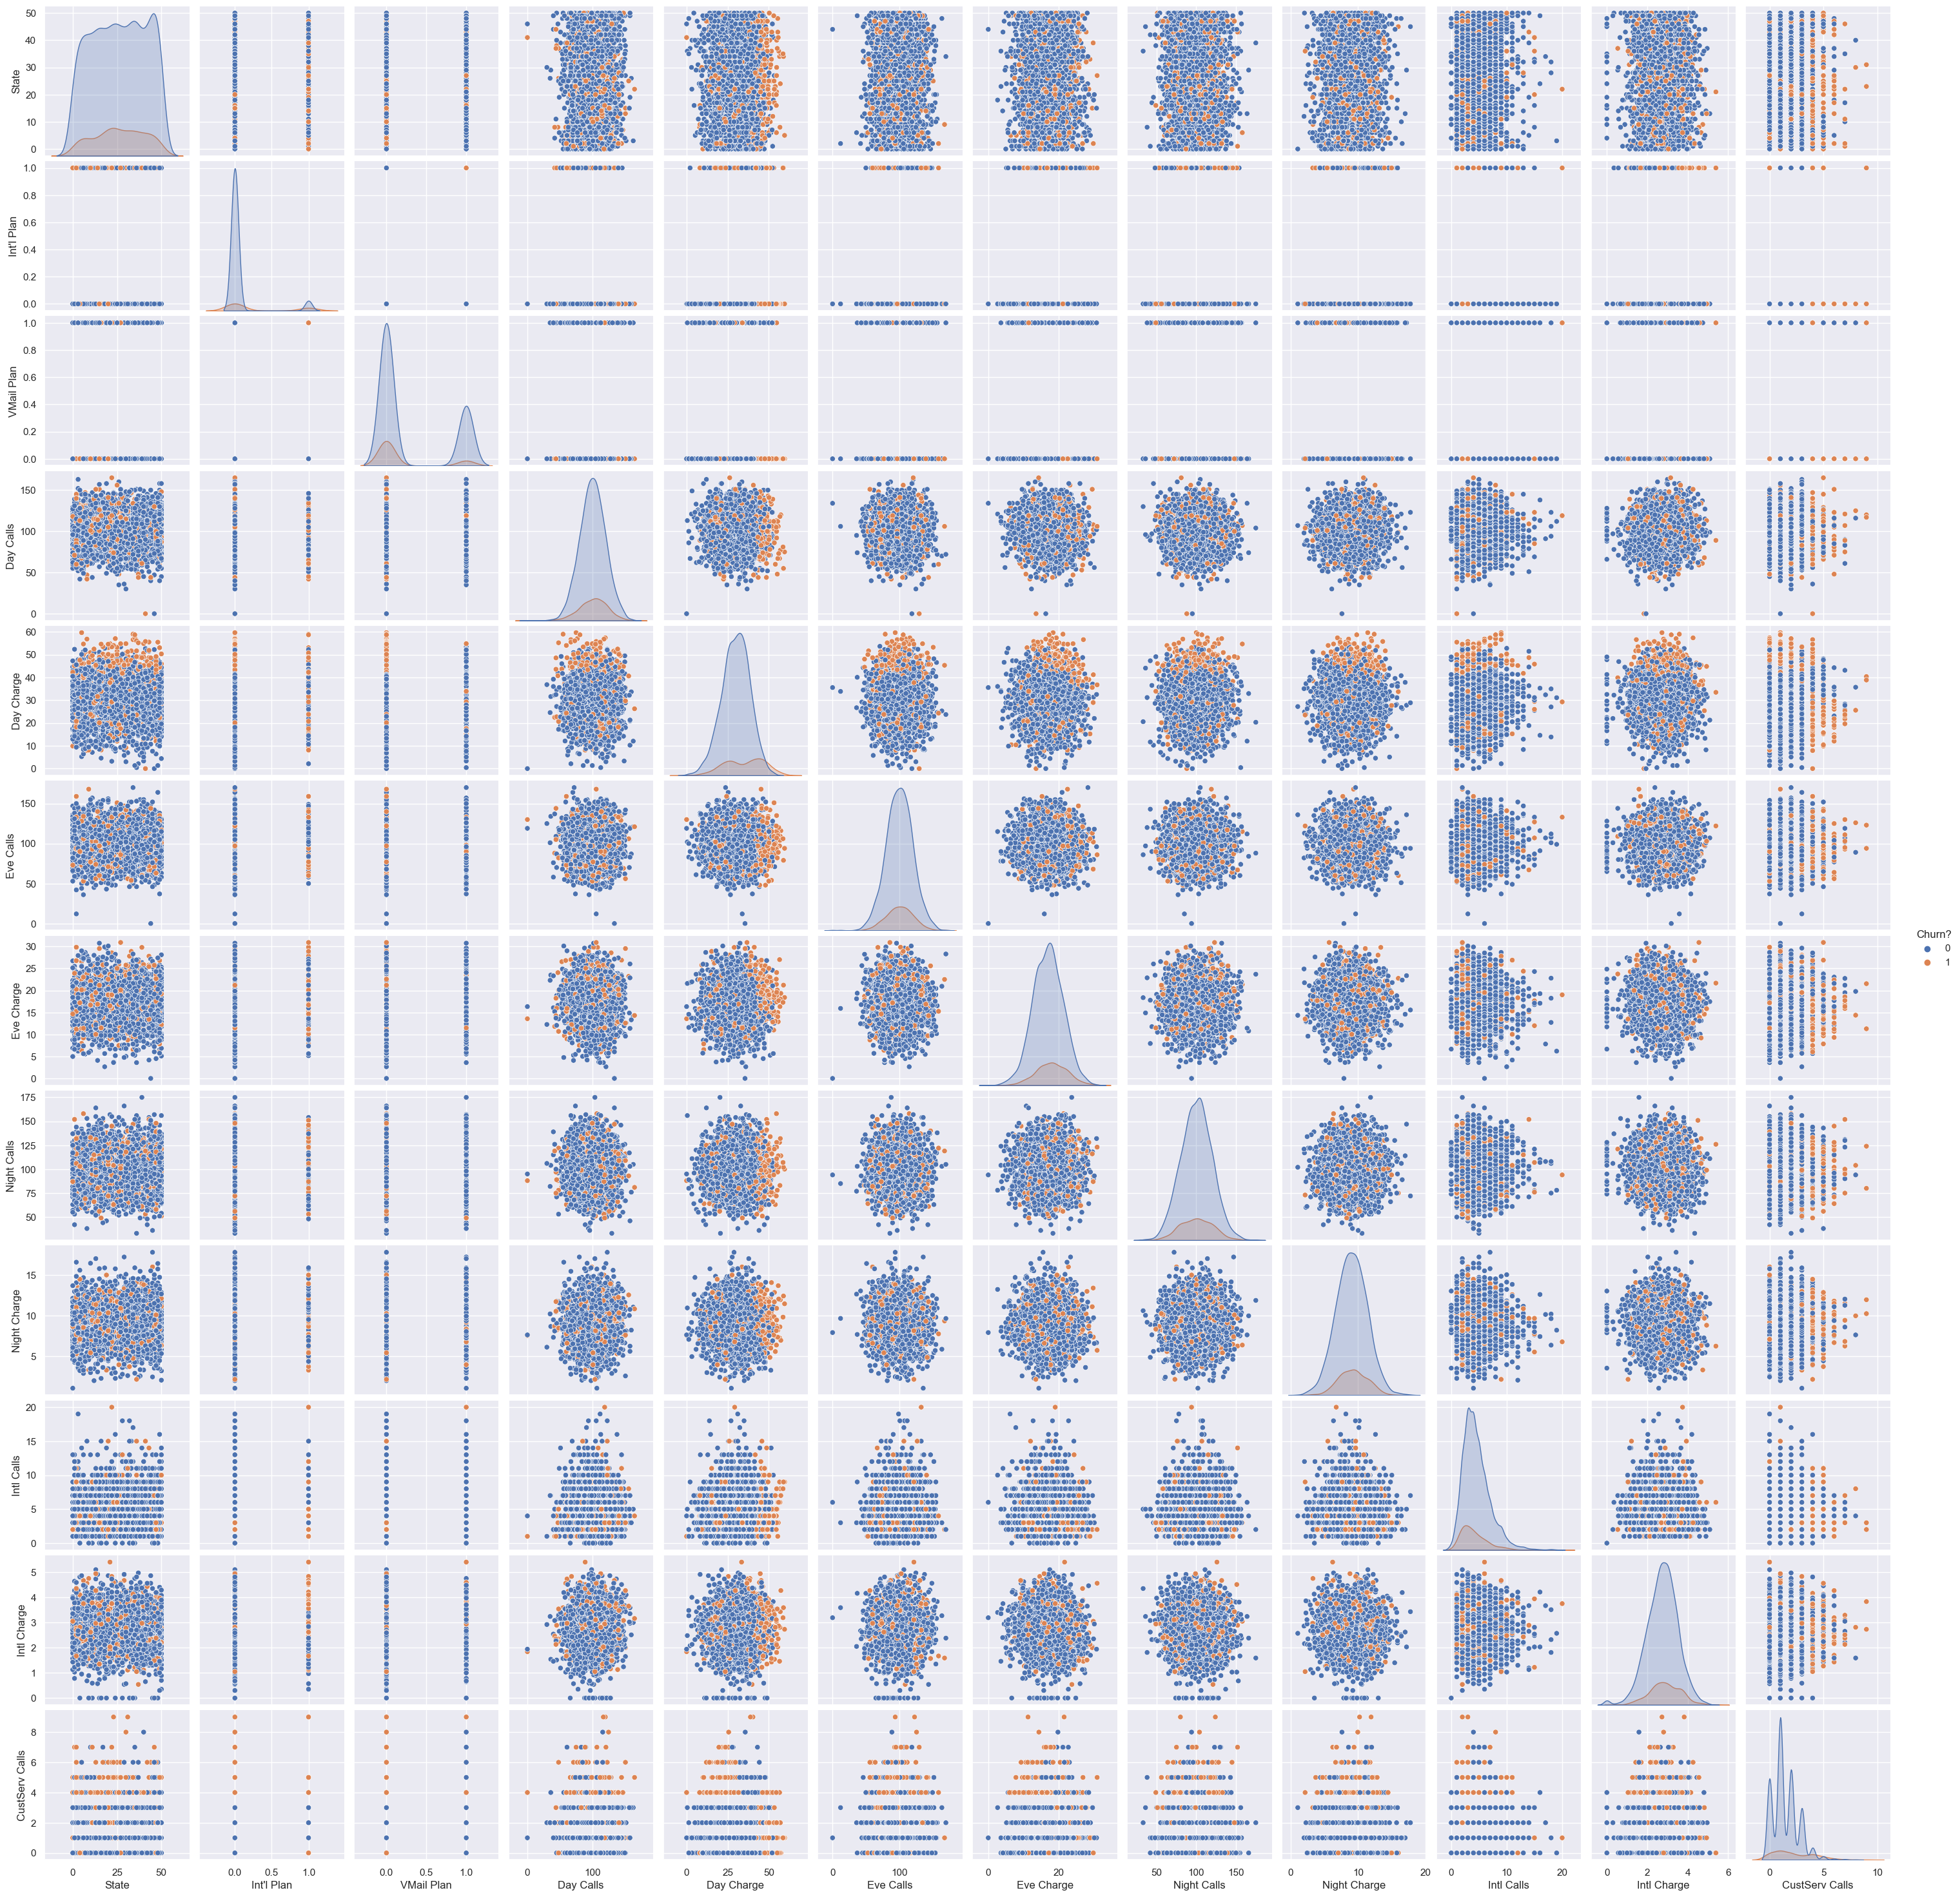

In [56]:
sns.pairplot(data=df, hue= "Churn?")
plt.show()

In [57]:
df.head(1)

State  Int'l Plan  VMail Plan  Day Calls  Day Charge  Eve Calls  \
0     16           0           1        110       45.07         99   

   Eve Charge  Night Calls  Night Charge  Intl Calls  Intl Charge  \
0       16.78           91         11.01           3          2.7   

   CustServ Calls  Churn?  
0               1       0

In [58]:
from sklearn .model_selection import train_test_split
X = df.drop("Churn?" ,axis = 1)
y= df["Churn?"]
# Split the data into training  and test sets
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3, stratify= y,random_state = 0)

In [59]:
 from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ["Day Calls", "Day Charge", "Night Calls", "Eve Charge", "Night Calls",
                    "Night Charge", "Intl Calls", "CustServ Calls"]

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))


# Handling Outliers

In [60]:
# setting up a threshold for outlier detection
threshold = 3
# finding the outlier based on the thresh hold
outlier_indices=np.where(z_scores>threshold)[0]
# removing the outliers from the training data
X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])

In [61]:
# importing required librqries for prediction

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [62]:
y.value_counts()

0    2850
1     483
Name: Churn?, dtype: int64

# SMOTE

In [63]:
# balancing our target Variable To avoid a bias results
from imblearn.over_sampling import SMOTE

smote = SMOTE (sampling_strategy= "minority")
X,y= smote.fit_resample(X,y)
y.value_counts()

0    2850
1    2850
Name: Churn?, dtype: int64

# feature Engineering

In [64]:
# Normaliziing our data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0]

array([0.32      , 0.        , 1.        , 0.66666667, 0.75570087,
       0.58235294, 0.54286639, 0.4084507 , 0.59593545, 0.15      ,
       0.5       , 0.11111111])

# modelling

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(random_state=23 ,max_iter=1000)

# define the range of C values to search over
param_grid = {"C": [0.001, 0.01, 1.0, 0.1, 1, 10, 100]}

# perform a grid search over the C values
cv = GridSearchCV(lr, param_grid, cv=5)
cv.fit(X_train, y_train)
# print the best C value and corresponding score
print("Best C:", cv.best_params_['C'])
print("Best score:", cv.best_score_)

Best C: 0.1
Best score: 0.8673229398663697


In [66]:
from sklearn.metrics import precision_score , recall_score, accuracy_score
lr = LogisticRegression(random_state=23, max_iter=1000)
# fit the model
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
#check model accuracy, precison and recall score
acc_score = accuracy_score(y_test, y_pred)
print("accuracy_score :", acc_score)
pre_score = precision_score(y_test, y_pred)
print("precision_score :", pre_score)
rec_score = recall_score(y_test, y_pred)
print("recall_score :",rec_score)

accuracy_score : 0.874
precision_score : 0.6862745098039216
recall_score : 0.2413793103448276


In [67]:
names = X_train.columns

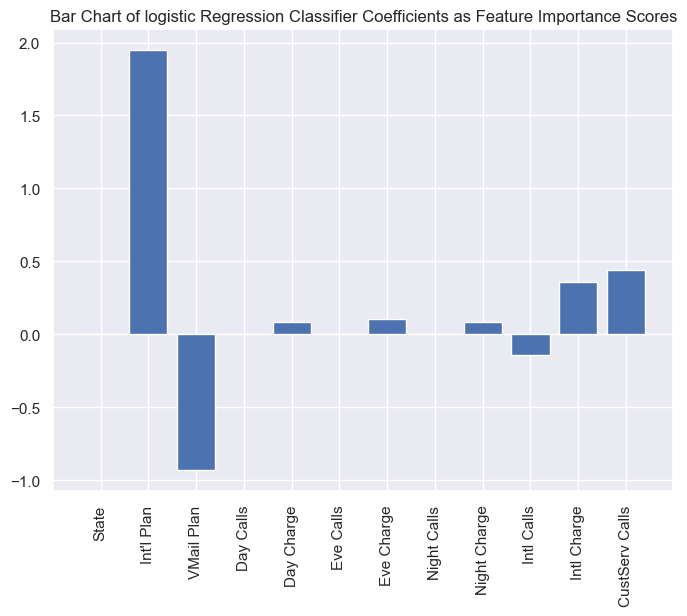

In [68]:
importance = lr.coef_[0]
# plot feature importancep
plt.figure(figsize=(8,6))
plt.bar( names, importance)
plt.xticks(rotation=90)
plt.title("Bar Chart of logistic Regression Classifier Coefficients as Feature Importance Scores")
plt.show()

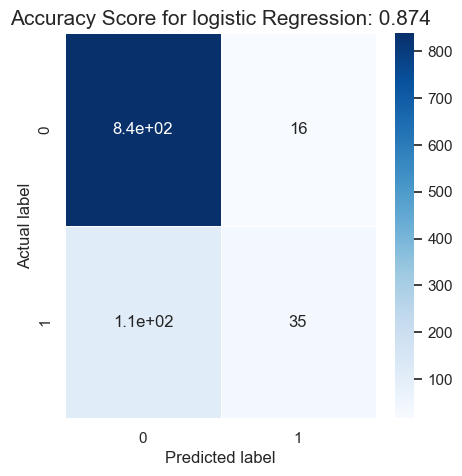

In [69]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5, annot=True, cmap ="Blues")
plt.ylabel( "Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score for logistic Regression: {0}".format(lr.score(X_test, y_test))
plt.title(all_sample_title, size = 15)
plt.show()


In [70]:
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight="balanced")
param_grid = {
"max_depth": [3, 4, 5, 6, 7, 8],
"min_samples_split": [2, 3, 4],
"min_samples_leaf": [1, 2, 3, 4],
"random_state": [0, 42]}
# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)
print("best_score :",grid_search.best_score_)


{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}
best_score : 0.9162929967829745


In [71]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=1, min_samples_split=2, class_weight="balanced")
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=0)

In [72]:
dtree = DecisionTreeClassifier(random_state=23)
# fit the model

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

#check model accuracy, precison and recall score
acc_score = accuracy_score(y_test, y_pred)
print("accuracy_score :", acc_score)

pre_score = precision_score(y_test, y_pred)
print("precision_score :", pre_score)

rec_score = recall_score(y_test, y_pred)
print("recall_score :",rec_score)


accuracy_score : 0.902
precision_score : 0.6407185628742516
recall_score : 0.7379310344827587


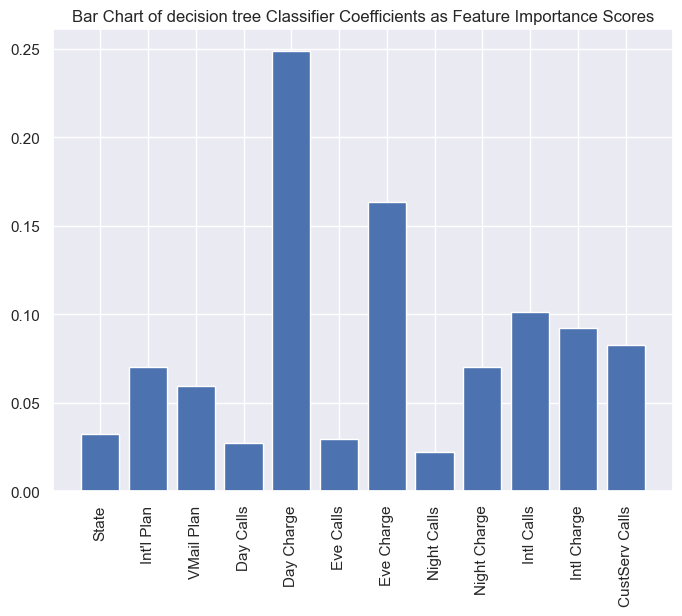

In [73]:
# visualize model
importance = dtree. feature_importances_
plt.figure(figsize=(8,6))
plt.bar(names, importance)
plt.xticks(rotation=90)
plt.title("Bar Chart of decision tree Classifier Coefficients as Feature Importance Scores")
plt.show()

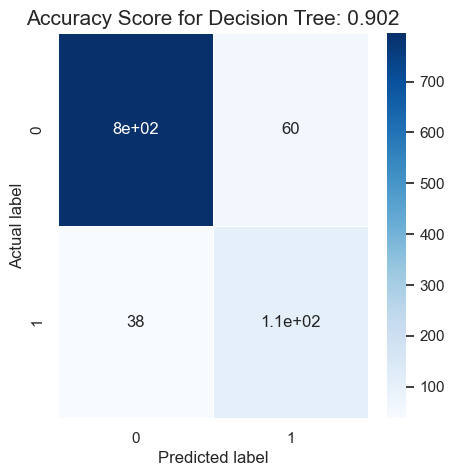

In [74]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5, annot=True, cmap ="Blues")
plt.ylabel( "Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score for Decision Tree: {0}".format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)
plt.show()



In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight="balanced")
param_grid = {
"n_estimators": [100, 200],
'max_depth': [None, 5, 10],
"max_features": ["sqrt", "log2", None],
"random_state": [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)
print("best_score :",grid_search.best_score_)

{'max_depth': None, 'max_features': None, 'n_estimators': 200, 'random_state': 0}
best_score : 0.942561742143034


In [76]:
# Perform a grid search with cross-validation to find the best hyperparameter

rfc = RandomForestClassifier(random_state=42, max_depth=None, max_features="sqrt", n_estimators=100, class_weight="balanced")
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [77]:
rfc =RandomForestClassifier(random_state=42)
# fit the model

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

#check model accuracy, precison and recall score
acc_score = accuracy_score(y_test, y_pred)
print("accuracy_score :", acc_score)

pre_score = precision_score(y_test, y_pred)
print("precision_score :", pre_score)

rec_score = recall_score(y_test, y_pred)
print("recall_score :",rec_score)


accuracy_score : 0.965
precision_score : 0.9583333333333334
recall_score : 0.7931034482758621


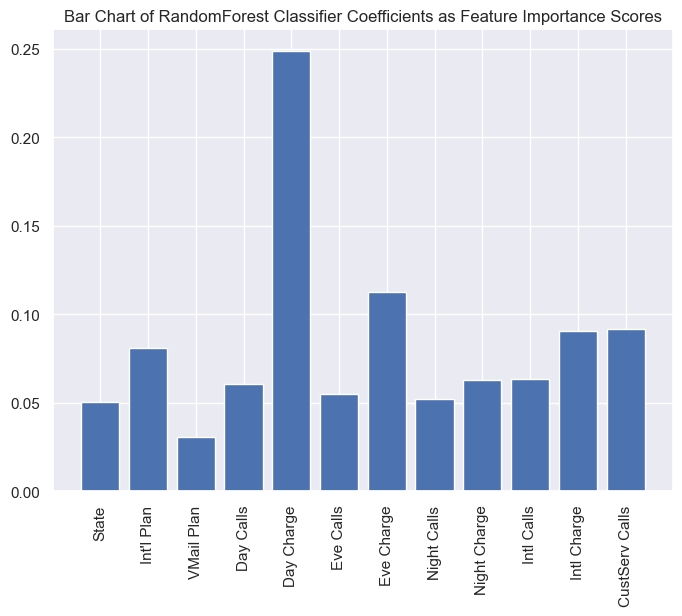

In [78]:
# show model
importance = rfc.feature_importances_


plt.figure(figsize=(8,6))
plt.bar(names, importance)
plt.xticks(rotation=90)



plt.title("Bar Chart of RandomForest Classifier Coefficients as Feature Importance Scores")

plt.show()

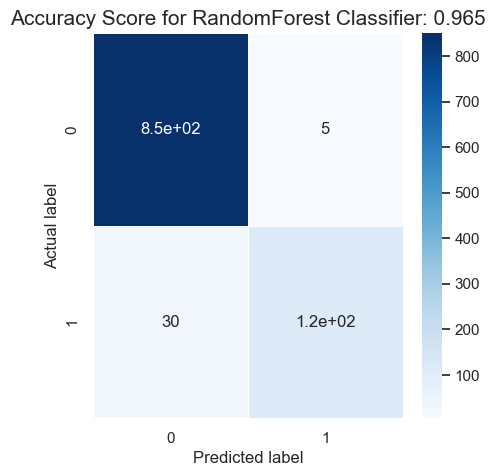

In [79]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5, annot=True, cmap ="Blues")
plt.ylabel( "Actual label")
plt.xlabel("Predicted label")
plt.title('Bar Chart of RandomForest Classifier Coefficients as Feature Importance Scores')
all_sample_title = "Accuracy Score for RandomForest Classifier: {0}".format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)
plt.show()



- we can see in our confusion matrix that we have 8.5million true positives **people are not going to churn** while we have true negatives of 1.2million subscribers **who have to churned**.

- we see in our confusion matrix 30 False negatives of **people not going to churn** but have some **tendencies of churning** while we have 5 subscribers False positive who are **likely** to churn but **havent churned

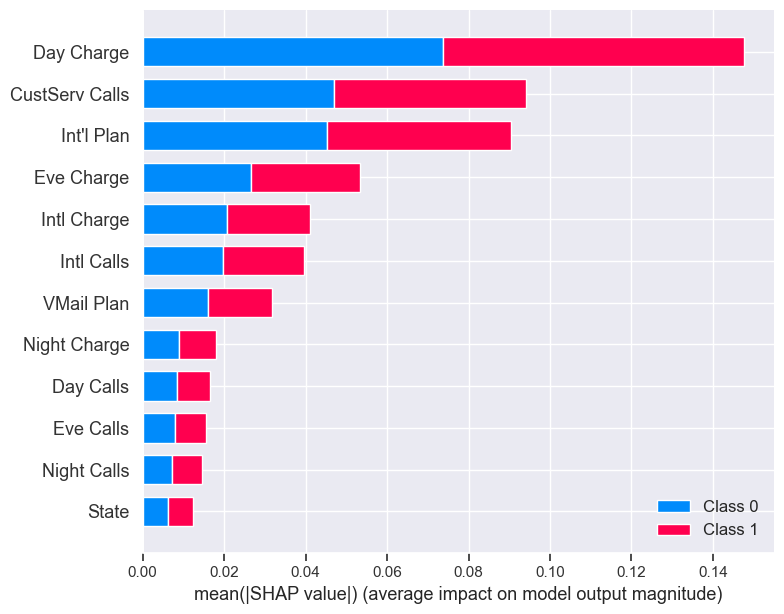

In [80]:
# show model Explainer
import shap
explainer = shap.TreeExplainer (rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

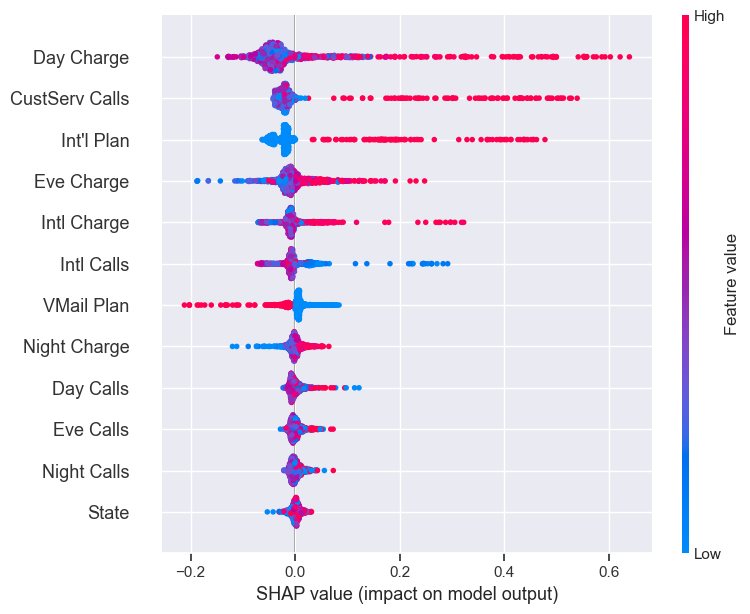

In [81]:
#compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)



- we can clear see that the positive shap features of our random forest classifier predict subscribers who are not going to churn
- while negative shap features predict subscribers who are going to churn
#### strong negative  features  subscribers include:
- VPlan
- Evening charge
- Night Charge
#### strong positive features subscribers include:
- Day charge
- custservice calls
- int'l plan
- int'l charge
- Evening charge
- int'l  calls

In [82]:
from sklearn .metrics import roc_curve , auc

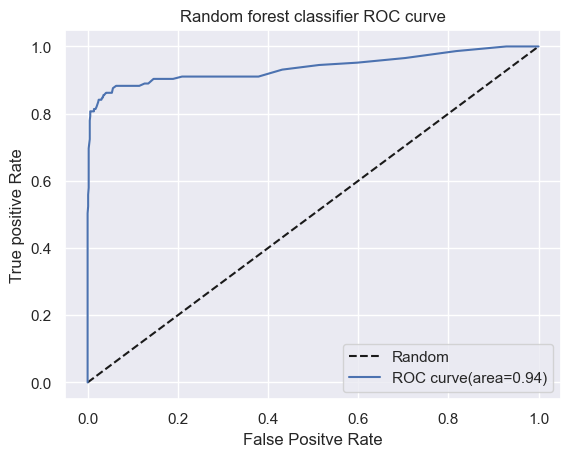

In [83]:
#predict using predict_proba
y_pred_proba=rfc.predict_proba(X_test)[:][:,1]
fpr,tpr,_=roc_curve(y_test,y_pred_proba)
roc_auc=auc(fpr,tpr)
# now draw ROC using fpr,tpr
plt.plot([0,1],[0,1],"k--",label="Random")
plt.plot(fpr,tpr,label="ROC curve(area=%0.2f)" %roc_auc)
plt.xlabel("False Positve Rate")
plt.ylabel("True positive Rate")
plt.title("Random forest classifier ROC curve")
plt.legend(loc="best")
plt.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:180%;
           font-family:Oswald;
           letter-spacing:0.7px">

<p style= "padding: 5px;
                  color:white;">
    
    
<p style = "text-align:center;"> End of Customer Churn prediction 📊

</p>
</div>
    

# Clustering 🕸


## primary  objective : 
- **show clusters** for each feature in the dataset
- **show clusters** for all Day Evening and Night showing their data points

In [47]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)
# reading our data
cul_df = pd.read_csv("churn.csv")
cul_df.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   CustServ Calls  Churn?  
0               1  False.  
1               1  False.  
2               0  False.  
3               2  False.  
4               3  False.  

[5 rows x 21 columns]

In [48]:
# dropping unneeded data
cul_df=cul_df.drop([ "Churn?" ,"State", "Phone","Account Length","Area Code" ,"VMail Message","Day Mins","Night Mins" ,"Intl Mins","Eve Mins"],axis=1, )

In [49]:
# checking the data types
cul_df.dtypes

Int'l Plan         object
VMail Plan         object
Day Calls           int64
Day Charge        float64
Eve Calls           int64
Eve Charge        float64
Night Calls         int64
Night Charge      float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
dtype: object

In [50]:
# statisical anaylysis
cul_df.describe()

Day Calls   Day Charge    Eve Calls   Eve Charge  Night Calls  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean    100.435644    30.562307   100.114311    17.083540   100.107711   
std      20.069084     9.259435    19.922625     4.310668    19.568609   
min       0.000000     0.000000     0.000000     0.000000    33.000000   
25%      87.000000    24.430000    87.000000    14.160000    87.000000   
50%     101.000000    30.500000   100.000000    17.120000   100.000000   
75%     114.000000    36.790000   114.000000    20.000000   113.000000   
max     165.000000    59.640000   170.000000    30.910000   175.000000   

       Night Charge   Intl Calls  Intl Charge  CustServ Calls  
count   3333.000000  3333.000000  3333.000000     3333.000000  
mean       9.039325     4.479448     2.764581        1.562856  
std        2.275873     2.461214     0.753773        1.315491  
min        1.040000     0.000000     0.000000        0.000000  
25%        7.520000     3.000000     2.300000        1.000000  
50%        9.050000     4.000000     2.780000        1.000000  
75%       10.590000     6.000000     3.270000        2.000000  
max       17.770000    20.000000     5.400000        9.000000

In [51]:

from sklearn.preprocessing import LabelEncoder

In [52]:
from sklearn import preprocessing
for col in cul_df.select_dtypes(include=[ "object"]).columns:
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    # Fit the encoder to the unique values in the column
    label_encoder.fit(cul_df[col].unique())
    # Transform the column using the encoder
    cul_df[col] = label_encoder.transform(cul_df[col])
    # Print the column name and the unique encoded values
    print(f"{col}: {cul_df[col].unique()}")

Int'l Plan: [0 1]
VMail Plan: [1 0]


In [53]:
cul_df1 = cul_df.copy()

In [54]:
from sklearn.preprocessing import StandardScaler


In [55]:
# standardization of features
scaled_features=StandardScaler().fit_transform(cul_df1.values)
scaled_features_cul_df=pd.DataFrame(scaled_features,index=cul_df1.index,columns=cul_df1.columns)

In [56]:
scaled_features_cul_df.head()

Int'l Plan  VMail Plan  Day Calls  Day Charge  Eve Calls  Eve Charge  \
0   -0.327580    1.617086   0.476643    1.567036  -0.055940   -0.070427   
1   -0.327580    1.617086   1.124503   -0.334013   0.144867   -0.107549   
2   -0.327580   -0.618396   0.675985    1.168464   0.496279   -1.573900   
3    3.052685   -0.618396  -1.466936    2.196759  -0.608159   -2.743268   
4    3.052685   -0.618396   0.626149   -0.240041   1.098699   -1.037939   

   Night Calls  Night Charge  Intl Calls  Intl Charge  CustServ Calls  
0    -0.465494      0.866029   -0.601195    -0.085690       -0.427932  
1     0.147825      1.059390   -0.601195     1.241169       -0.427932  
2     0.198935     -0.755571    0.211534     0.697156       -1.188218  
3    -0.567714     -0.078806    1.024263    -1.306401        0.332354  
4     1.067803     -0.276562   -0.601195    -0.045885        1.092641

#### Elbow method

In [57]:

from sklearn.cluster import KMeans

In [58]:
inertias=[]

In [59]:
max_k= 10

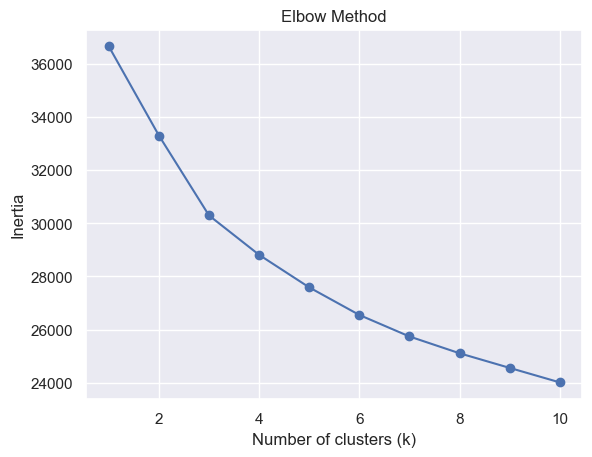

In [60]:
def find_optimal_k_elbow(scaled_features_cul_df,max_k):
    for k in range(1, max_k + 1):
        kmeans=KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_features_cul_df)
        inertias.append(kmeans.inertia_)
    plt.plot(range(1,max_k+1),inertias,marker="o")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia")
    plt.title("Elbow Method")
    plt.show()
find_optimal_k_elbow(scaled_features_cul_df,max_k)    

#### silhouette_score

In [61]:
from sklearn . metrics import silhouette_score

In [62]:
silhouette_scores=[]

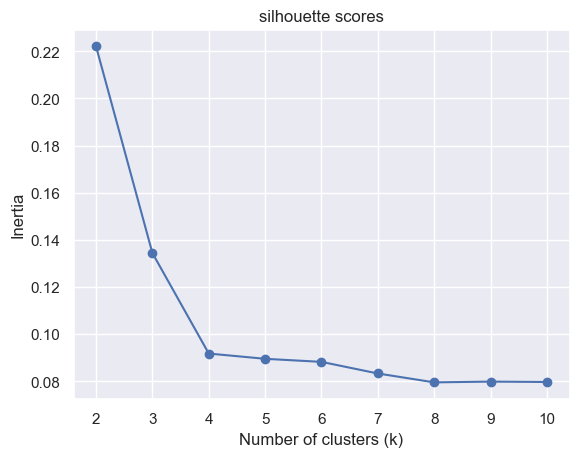

In [63]:
def find_optimal_k_silhouette(scaled_features_cul_df,max_k):
    #silhouette=[]
    for k in range(2, max_k + 1):
        kmeans=KMeans(n_clusters=k,random_state=42)
        kmeans.fit(scaled_features_cul_df)
        labels=kmeans.labels_
        silhouette_scores.append(silhouette_score(scaled_features_cul_df,labels))
    plt.plot(range(2,max_k+1),silhouette_scores,marker="o")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia")
    plt.title("silhouette scores")
    plt.show()
        
        
        
        
        
find_optimal_k_silhouette(scaled_features_cul_df,max_k)    

In [64]:
# getting silhouette scores
silhouette_scores

[0.22210765384050418,
 0.13443260462035014,
 0.09179171496378141,
 0.08956498162578633,
 0.08826141002607764,
 0.08333628523544805,
 0.0795662674016494,
 0.07989246224861221,
 0.07972822383710369]

In [65]:
# getting required clusters
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+3
print("number of clusters Required is :",number_of_clusters)

number of clusters Required is : 3


In [66]:
# fitting clusters with scaled df
kmeans=KMeans(n_clusters = number_of_clusters,random_state=42).fit(scaled_features_cul_df)
pred=kmeans.predict(scaled_features_cul_df)
cul_df["cluster"]=pred+1

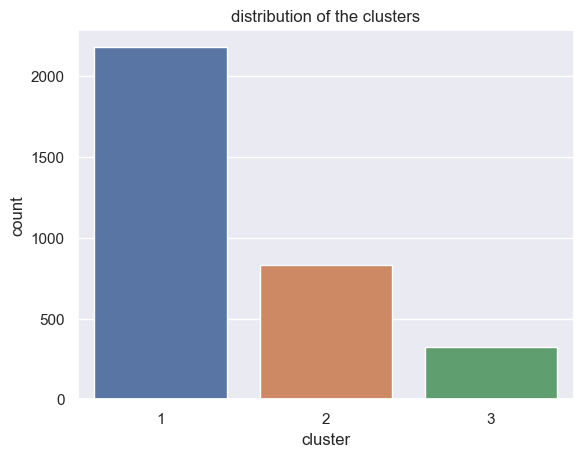

In [67]:
# visualize clusters
pl= sns.countplot(x=cul_df["cluster"])
pl.set_title("distribution of the clusters")
plt.show()

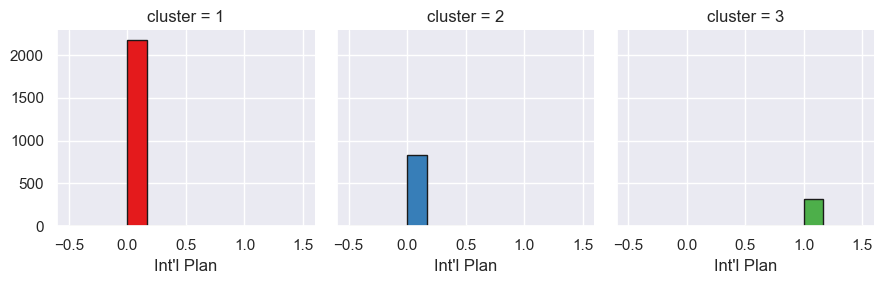

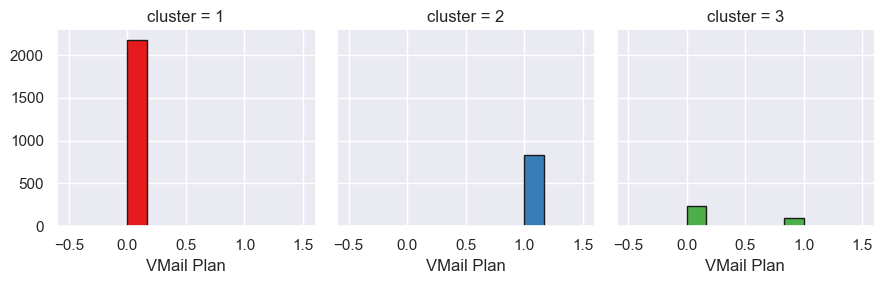

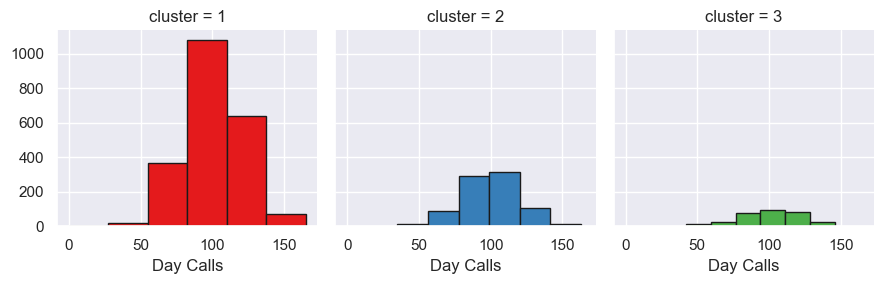

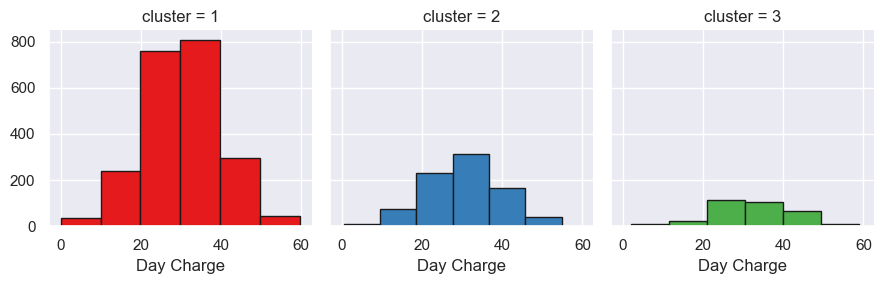

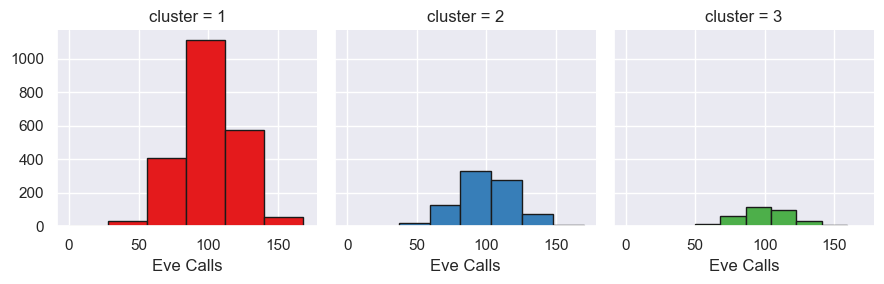

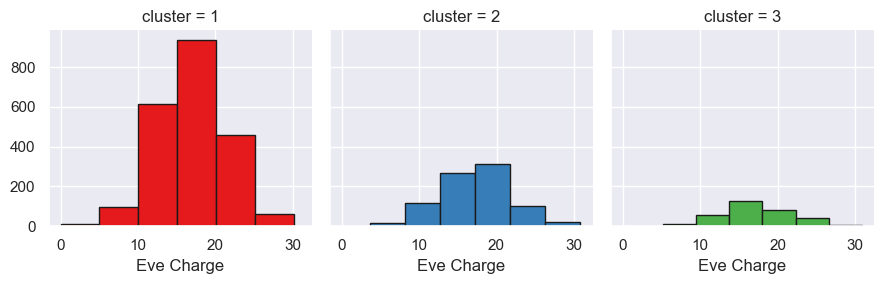

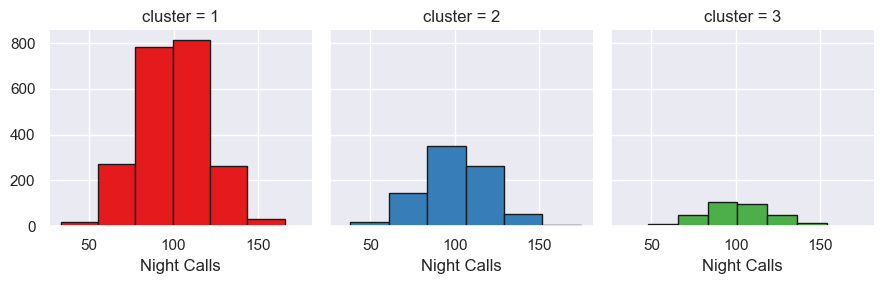

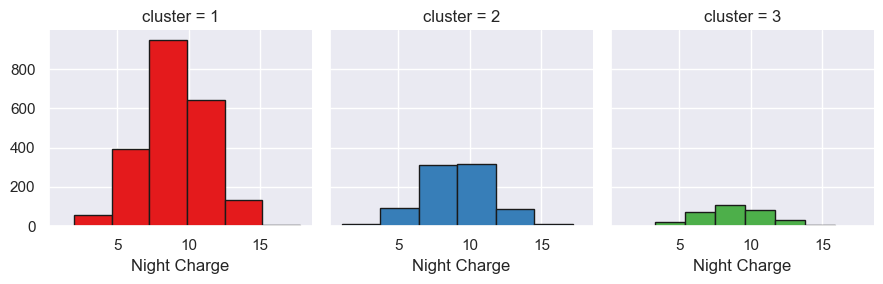

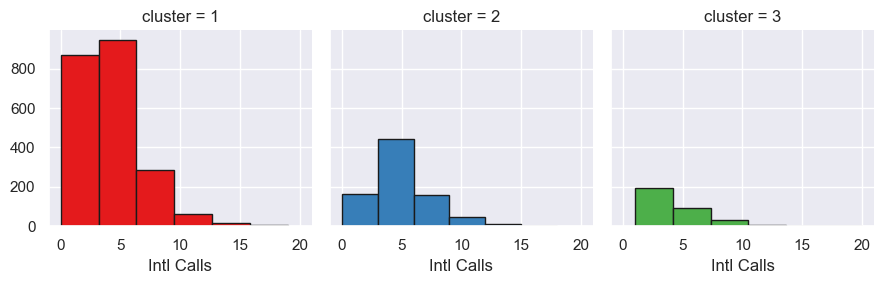

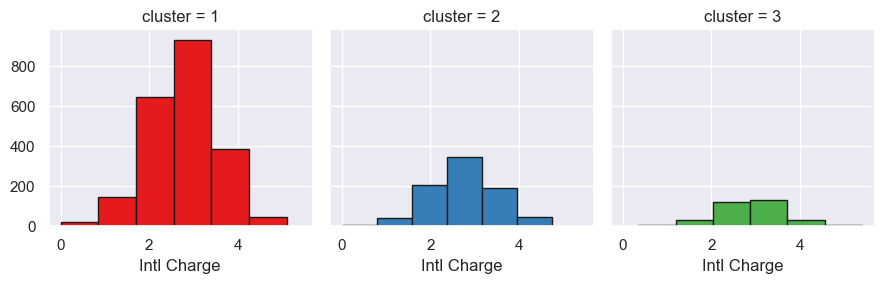

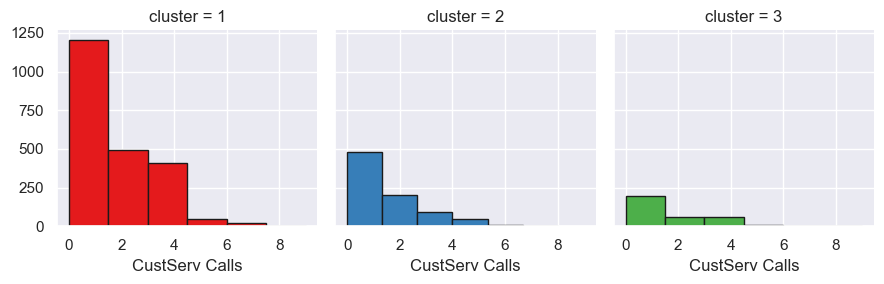

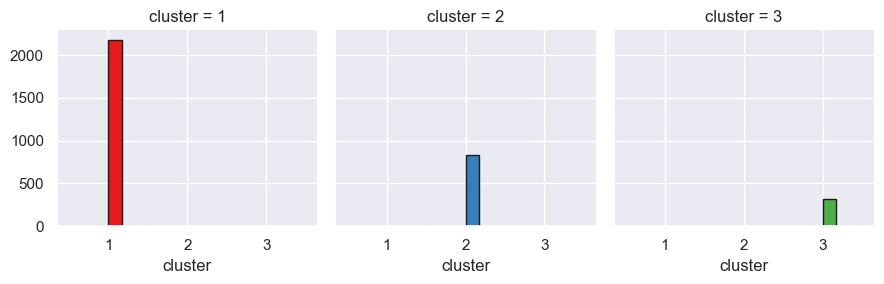

In [68]:
for i in cul_df:
    diag = sns.FacetGrid(cul_df,col="cluster",hue="cluster",palette= "Set1")
    diag.map(plt.hist,i, bins=6, ec="k")

##### Based on the on the diagram above
- **cluster one** belong to subscribers who are the highest active customers
- **cluster two** belong to subscribers who are moderately active customers 
- **cluster three** belong to the least active subcribers

# .... Now lets predict call clusters for day ,evening and night

In [69]:
cul_df.head(1)

Int'l Plan  VMail Plan  Day Calls  Day Charge  Eve Calls  Eve Charge  \
0           0           1        110       45.07         99       16.78   

   Night Calls  Night Charge  Intl Calls  Intl Charge  CustServ Calls  cluster  
0           91         11.01           3          2.7               1        2

In [70]:
max_k=10

In [71]:
# geting columns for prediction
selected_columns=["Day Calls","Eve Calls","Night Calls"]

In [72]:
# using x for predicted columns
X=cul_df[selected_columns]

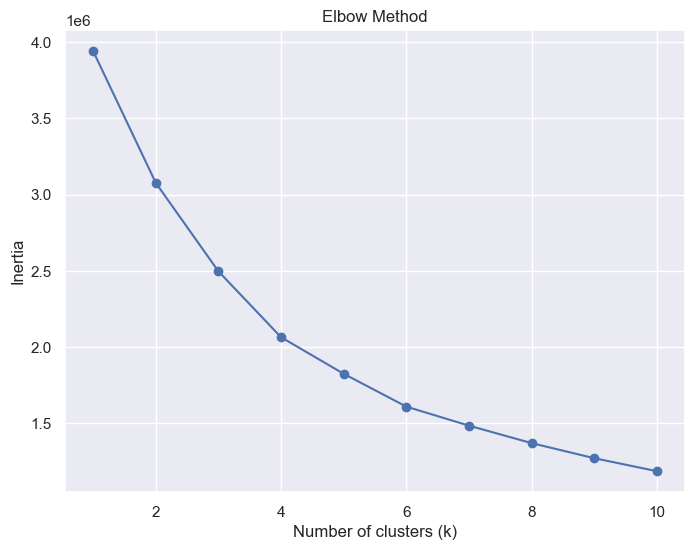

Int'l Plan  VMail Plan  Day Calls  Day Charge  Eve Calls  Eve Charge  \
0              0           1        110       45.07         99       16.78   
1              0           1        123       27.47        103       16.62   
2              0           0        114       41.38        110       10.30   
3              1           0         71       50.90         88        5.26   
4              1           0        113       28.34        122       12.61   
...          ...         ...        ...         ...        ...         ...   
3328           0           1         77       26.55        126       18.32   
3329           0           0         57       39.29         55       13.04   
3330           0           0        109       30.74         58       24.55   
3331           1           0        105       36.35         84       13.57   
3332           0           1        113       39.85         82       22.60   

      Night Calls  Night Charge  Intl Calls  Intl Charge  CustServ Calls  \
0              91         11.01           3         2.70               1   
1             103         11.45           3         3.70               1   
2             104          7.32           5         3.29               0   
3              89          8.86           7         1.78               2   
4             121          8.41           3         2.73               3   
...           ...           ...         ...          ...             ...   
3328           83         12.56           6         2.67               2   
3329          123          8.61           4         2.59               3   
3330           91          8.64           6         3.81               2   
3331          137          6.26          10         1.35               2   
3332           77         10.86           4         3.70               0   

      cluster  label  
0           2      2  
1           2      2  
2           1      2  
3           3      1  
4           3      0  
...       ...    ...  
3328        2      0  
3329        1      1  
3330        1      1  
3331        3      0  
3332        2      2  

[3333 rows x 13 columns]

In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to find optimal k using the Elbow Method
def find_optimal_k_elbow(X, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans .fit(X)
        inertias.append(kmeans.inertia_)
            # Plot Elbow graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), inertias, marker="o")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia")
    plt.title("Elbow Method")

    plt.show()

# Return the fitted KMeans model with optimal k
    optimal_k = np.argmin(np.diff(inertias)) + 3

    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(X)

    return kmeans


# Function to find optimal k using the Silhouette Score
def find_optimal_k_silhouette(X, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans .fit(X)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X, labels))

# Plot Silhouette Score graph

    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker="o")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score")
    plt.show()
    
    # Return the fitted KMeans model with optimal k
    optimal_k = np.argmax(silhouette_scores) + 2

    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans . fit(X)

    return kmeans

kmeans_model = find_optimal_k_elbow(X, max_k)

# Predict cluster Labels and add ‘label’ column to the DataFrame
cul_df["label"] = kmeans_model.predict(X)


cul_df

<IPython.core.display.Javascript object>


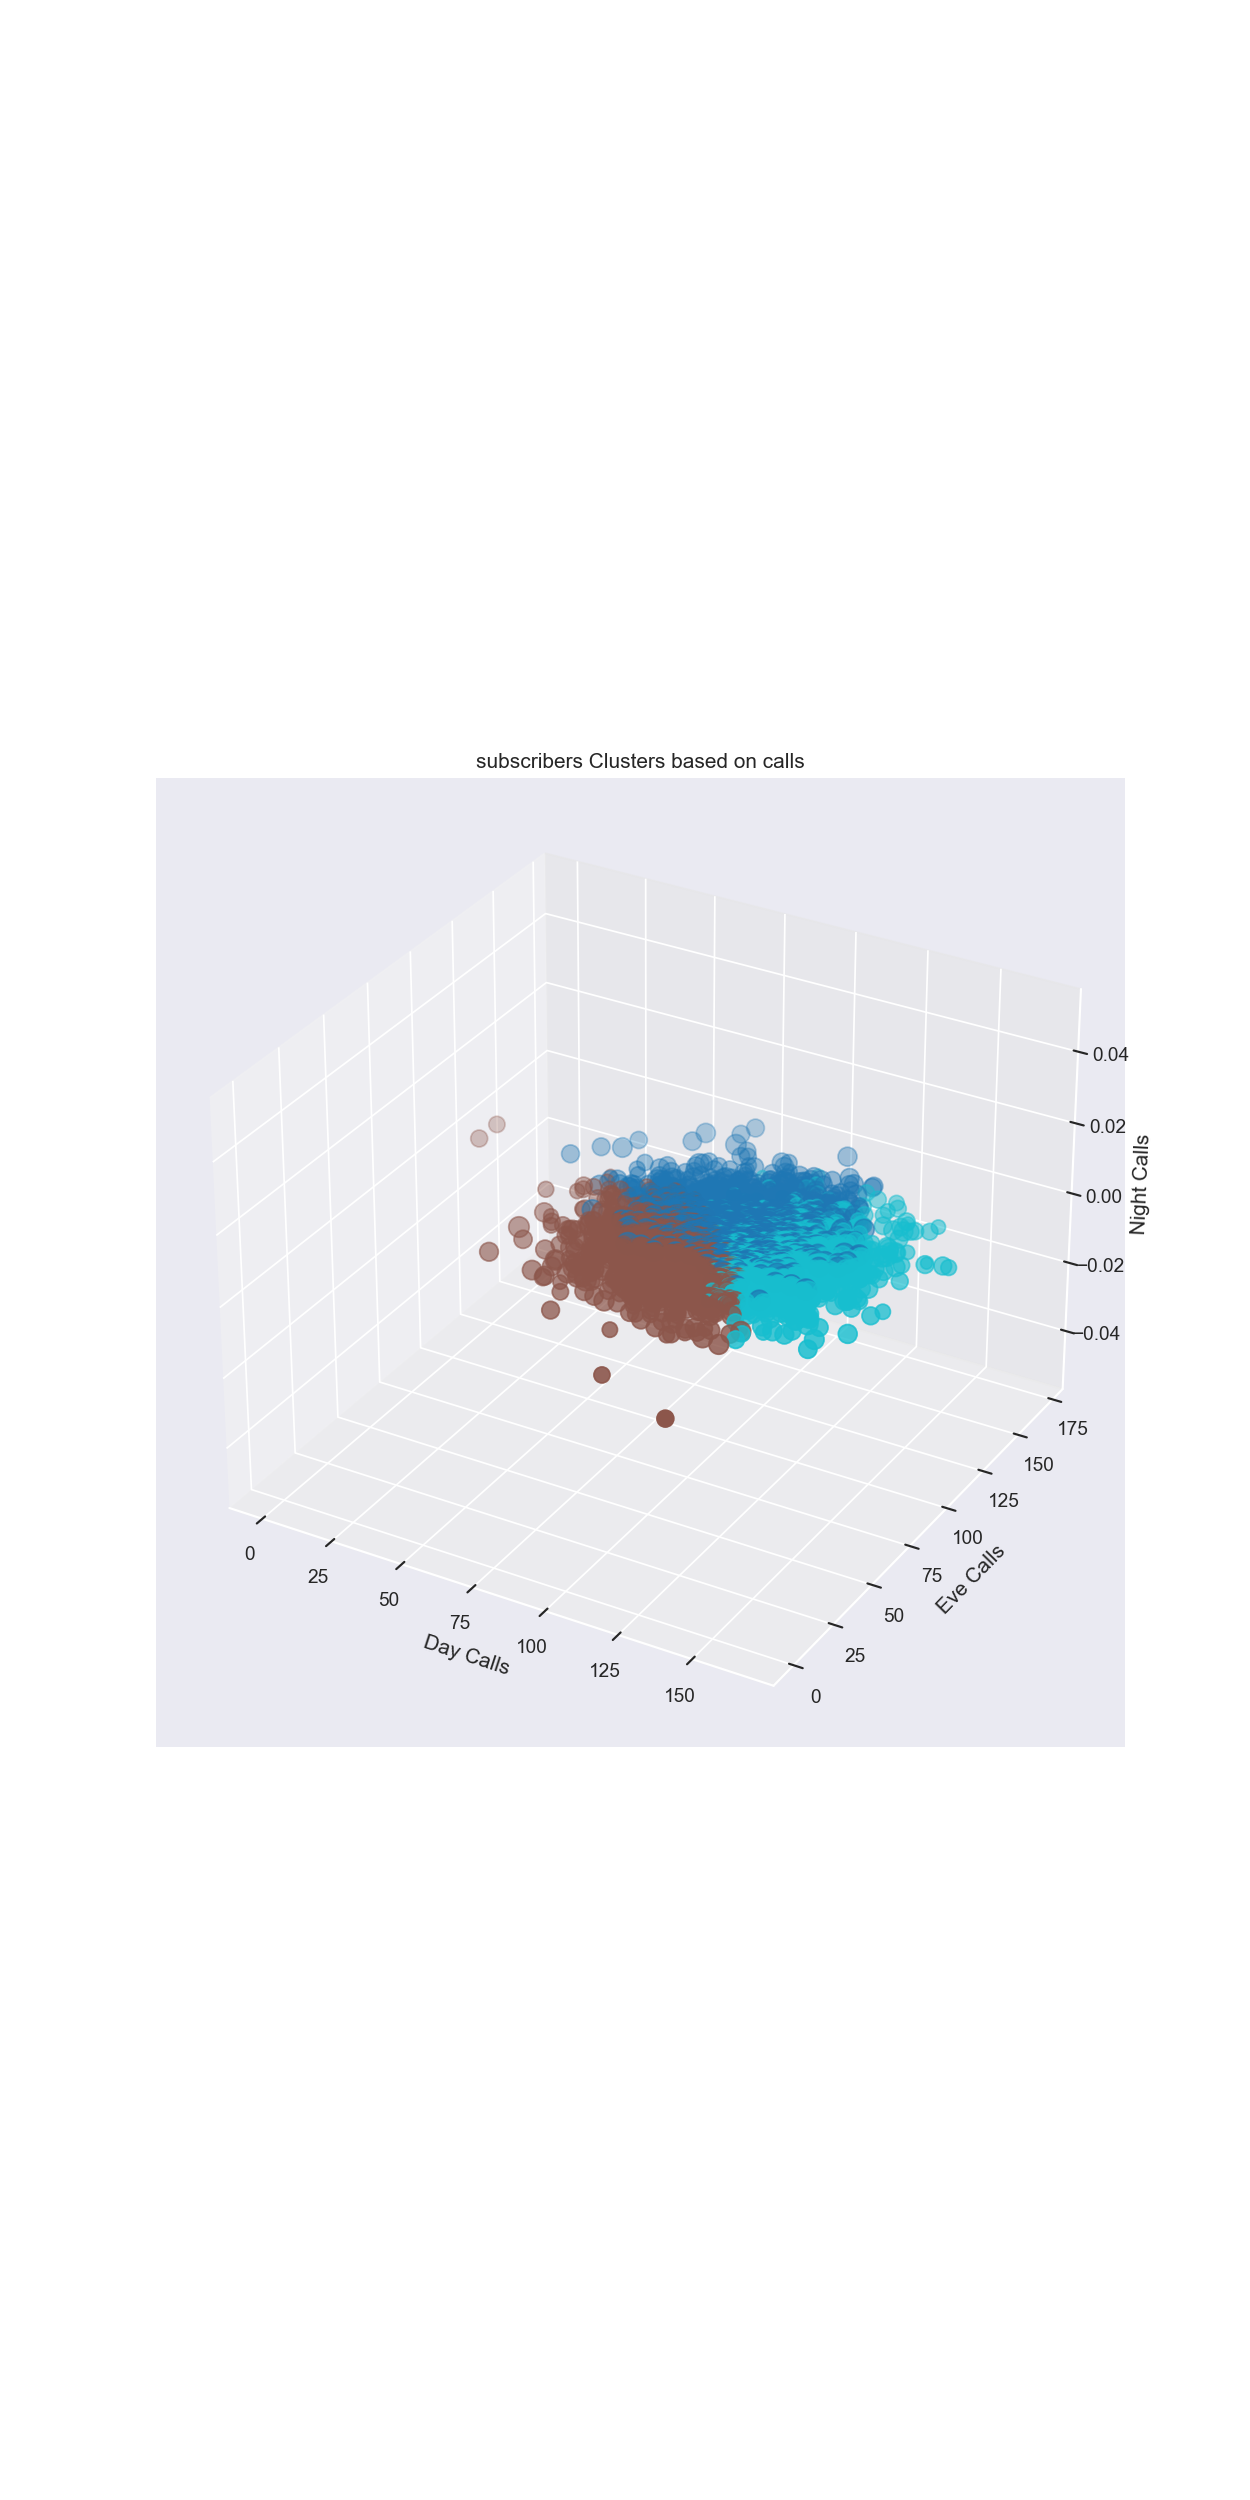

In [75]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# 3D Visualization of the Clusters
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection="3d")

#Create a colormap for the clusters
colors = plt.cm.tab10(cul_df["label"] / float(max(cul_df["label"])))

# Plot the data points
plt.scatter(cul_df["Day Calls"], cul_df["Eve Calls"], cul_df["Night Calls"], c=colors,)

# Set Labels for the axes
ax.set_xlabel("Day Calls")
ax.set_ylabel("Eve Calls")
ax.set_zlabel("Night Calls")

# Set the title
ax.set_title("subscribers Clusters based on calls")

plt.show()
